In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
plt.rcParams["figure.figsize"] = (16,9)

In [2]:
database = pd.read_csv('hipertensao.csv', sep=';', low_memory=False)

In [3]:
database.shape

(25000, 942)

# Pré-proscessamento - Removendo variáveis não importantes para o problema

In [4]:
listas = [
    ["C001", "C00301", "C004", "C00701", "C00702", "C00703", "C011", "C012"],
    ["D001", "D003", "D004", "D005", "D006", "D007", "D008", "D009", "D010", "D011", "D012", "D013", "D014", "D015"],
    ["E004", "E005", "E006", "E007", "E008", "E01001", "E01002", "E01003", "E01201", "E01501", "E01601", "E01603", "E01605", "E01801", "E01803", "E01805", "E020", "E021", "E022", "E023", "E024", "E025", "E02501", "E02502", "E026", "E027"],
    ["F001", "F00102", "F007", "F00702", "F008", "F00802"],
    ["G001", "G002", "G00201", "G003", "G004", "G005", "G006", "G007", "G00701", "G008", "G009", "G010", "G014", "G015", "G01501", "G016", "G017", "G018", "G021", "G022", "G02201", "G023", "G024", "G02501", "G02502", "G02503", "G026", "G027", "G032"],
    ["I002", "I003", "I004", "I005", "I006", "I007", "I00701", "I008", "I009", "I010", "I011"],
    ["J002", "J003", "J004", "J005", "J006", "J007", "J008", "J009", "J010", "J013", "J014", "J015", "J016", "J017", "J018", "J019", "J020", "J021", "J022", "J023", "J024", "J025", "J026", "J027", "J029", "J030", "J031", "J032", "J033", "J034", "J035", "J036", "J037", "J038", "J039", "J04001", "J04002", "J041", "J042", "J043", "J044", "J045", "J046", "J047", "J048", "J049", "J050", "J051", "J052", "J053", "J054", "J055", "J056", "J057", "J058", "J059", "J060"],
    ["K001", "K002", "K003", "K004", "K005", "K006", "K007", "K008", "K009", "K010", "K011", "K012", "K013", "K014", "K015", "K016", "K017", "K018", "K019", "K020", "K021", "K022", "K023", "K024", "K025", "K026", "K027", "K028", "K029", "K030", "K031", "K032", "K033", "K034", "K035", "K036", "K039", "K040", "K041", "K042", "K043", "K044", "K045", "K046", "K047", "K048", "K049", "K050", "K051", "K052", "K053", "K054", "K055", "K056", "K057", "K058", "K059", "K06001", "K06002", "K06003", "K06101", "K06102", "K062"],
    ["L00201", "L00202", "L00203", "L003", "L004", "L005", "L006", "L007", "L008", "L009", "L010", "L011", "L012", "L013", "L014", "L015", "L01613", "L01614", "L01615", "L01616", "L01617", "L01618", "L01619", "L01620", "L01621", "L01622", "L01623", "L01624", "L01701", "L01702", "L01703", "L01704", "L01705", "L01706", "L01707", "L01708", "L01709", "L01710", "L01711", "L01712", "L01713", "L01714", "L01715", "L01716", "L018", "L019", "L020"],
    ["M001", "M002", "M003", "M005", "M01301", "M01302", "M01303", "M017", "M018", "M019"],
    ["N007", "N008", "N019", "N020", "N021", "N022", "N023"],
    ["O004", "O005", "O006", "O007", "O008", "O009", "O00901", "O010", "O011", "O012", "O013", "O014", "O015", "O016", "O017", "O01801", "O01802", "O019", "O020", "O021", "O02101", "O022", "O023", "O024", "O025", "O027", "O028", "O029", "O030", "O031", "O032", "O033", "O034", "O035", "O036", "O037", "O038", "O039", "O040", "O041", "O042", "O043", "O044", "O045", "O046", "O047", "O048"],
    ["P004", "P00401", "P021", "P030", "P036", "P046", "P047", "P048", "P049", "P052", "P057", "P060", "P061", "P062", "P063", "P064", "P065", "P066", "P069", "P07001", "P07002", "P07003", "P071", "P072"],
    ["Q003", "Q004", "Q005", "Q006", "Q007", "Q008", "Q009", "Q010", "Q011", "Q012", "Q013", "Q014", "Q015", "Q016", "Q017", "Q01801", "Q01802", "Q01803", "Q01804", "Q01805", "Q01806", "Q01807", "Q01808", "Q01901", "Q01902", "Q01903", "Q01904", "Q01905", "Q020", "Q021", "Q022", "Q023", "Q024", "Q026", "Q027", "Q028", "Q029", "Q030", "Q031", "Q032", "Q033", "Q03401", "Q03402", "Q035", "Q036", "Q037", "Q038", "Q039", "Q040", "Q041", "Q042", "Q043", "Q044", "Q045", "Q04601", "Q04602", "Q04603", "Q04604", "Q04605", "Q04606", "Q04607", "Q04608", "Q04609", "Q04701", "Q04702", "Q04703", "Q04704", "Q04705", "Q048", "Q049", "Q050", "Q051", "Q052", "Q053", "Q054", "Q05501", "Q05502", "Q05503", "Q05504", "Q05505", "Q05506", "Q05507", "Q05508", "Q05509", "Q056", "Q057", "Q058", "Q059", "Q060", "Q061", "Q06201", "Q06202", "Q06203", "Q06204", "Q06205", "Q06206", "Q063", "Q06301", "Q06302", "Q06303", "Q06304", "Q064", "Q06501", "Q06502", "Q06503", "Q06504", "Q066", "Q067", "Q068", "Q069", "Q070", "Q071", "Q07201", "Q07202", "Q07203", "Q07204", "Q07205", "Q07206", "Q073", "Q074", "Q075", "Q076", "Q07701", "Q07702", "Q078", "Q079", "Q080", "Q08101", "Q08102", "Q08103", "Q08104", "Q08105", "Q082", "Q083", "Q084", "Q085", "Q08601", "Q08603", "Q08604", "Q08605", "Q087", "Q088", "Q089", "Q09001", "Q09003", "Q09004", "Q09005", "Q091", "Q092", "Q093", "Q094", "Q095", "Q09601", "Q09602", "Q09603", "Q097", "Q098", "Q100", "Q101", "Q102", "Q103", "Q104", "Q105", "Q106", "Q107", "Q108", "Q109", "Q110", "Q11001", "Q11002", "Q11003", "Q11004", "Q111", "Q112", "Q113", "Q11401", "Q11402", "Q11403", "Q115", "Q116", "Q11601", "Q11602", "Q11603", "Q117", "Q11801", "Q11802", "Q11803", "Q11804", "Q119", "Q120", "Q121", "Q122", "Q123", "Q124", "Q125", "Q12601", "Q12602", "Q12603", "Q12604", "Q12605", "Q127", "Q128", "Q130", "Q131", "Q132", "Q133", "Q134", "Q135", "Q136", "Q137"],
    ["R001", "R002", "R003", "R004", "R005", "R006", "R007", "R008", "R009", "R010", "R011", "R012", "R013", "R014", "R015", "R016", "R017", "R018", "R019", "R020", "R021", "R022", "R023", "R024", "R025", "R026", "R027", "R028", "R029", "R030", "R031", "R032", "R033", "R034", "R035", "R03601", "R03602", "R03603", "R03604", "R03605", "R03606", "R03607", "R03608", "R03609", "R03610", "R03611", "R037", "R038", "R039", "R040", "R041", "R04101", "R042", "R04201", "R043", "R044", "R045", "R046", "R047", "R048", "R04901", "R04902", "R04903"], 
    ["S001", "S002", "S003", "S004", "S005", "S006", "S007", "S008", "S009", "S01001", "S01002", "S01003", "S01004", "S01005", "S01101", "S01102", "S01103", "S012", "S013", "S01401", "S01402", "S01403", "S01404", "S01405", "S015", "S016", "S017", "S018", "S019", "S020", "S021", "S022", "S023", "S024", "S025", "S026", "S027", "S028", "S029", "S030", "S031", "S032", "S033", "S034", "S035", "S036", "S037", "S038", "S039", "S040", "S041", "S042", "S043", "S044", "S045", "S046", "S047", "S048", "S049", "S050", "S051", "S052", "S053", "S054", "S055", "S056", "S057", "S058"], 
    ["U001", "U00201", "U00202", "U00203", "U004", "U005", "U006", "U009", "U010", "U011", "U014", "U015", "U01701", "U01702", "U01801", "U01802", "U019", "U020", "U021", "U022", "U023", "U02301", "U024", "U02401", "U025"],
    ["X003", "X004", "X005", "X006", "X007", "X008", "X011", "X012", "X01401", "X01402", "X01501", "X01502", "X016", "X017", "X018", "X019", "X02001", "X02002", "X02003", "X02004", "X02005", "X02006", "X02201", "X02202", "X02203", "X02204", "X02205", "X02206", "X024", "X02501", "X02502", "X02503", "X02504", "X02505", "X02506", "X02507", "X02508", "X02509", "X02510"],      
    ["VDF001", "VDF00102", "V0024", "UPA_PNS", "V0006_PNS", "UPA", "V0025", "W00101", "W00102", "W00103", "W00201", "W00202", "W00203", "W00301", "W00302", "W00303", "W00401", "W00402", "W00403", "W00404", "W00405", "W00406", "W00407", "W00408", "V0028", "V0029", "V00281", "V00291", "V00282", "V00292", "V00283", "V00293", "VDD004", "VDE001", "VDE002", "VDDATAM"]
]

In [5]:
for lista in listas:
    database.drop(columns=lista, inplace=True)

# Pegando a faixa de 18 a 25 anos

In [6]:
database = database[database['C008'] <= 25]
print(database.shape)
database.head()

(2421, 152)


,V0001,C006,C008,C009,C010,D002,E001,E002,E003,E011,...,P05901,P05902,P05903,P05904,P067,P068,Q001,Q002,X001,X002
68,11,2,23,4,1.0,2.0,2.0,2.0,2.0,NaN,...,.,.,.,.,3.0,5.0,1.0,1.0,2.0,4.0
77,11,2,24,4,1.0,2.0,2.0,2.0,2.0,NaN,...,.,.,.,.,3.0,4.0,1.0,1.0,3.0,4.0
146,11,2,19,4,2.0,2.0,2.0,2.0,2.0,NaN,...,.,.,.,.,3.0,5.0,1.0,1.0,2.0,8.0
154,11,1,21,4,1.0,2.0,1.0,NaN,NaN,1.0,...,.,.,.,.,3.0,5.0,3.0,1.0,5.0,NaN
162,11,2,24,4,1.0,2.0,2.0,2.0,2.0,NaN,...,.,.,.,.,3.0,5.0,2.0,1.0,5.0,NaN


# Mostrando quantidade de atributos não nulos da base

In [7]:
database.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2421 entries, 68 to 24997
Data columns (total 152 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0001   2421 non-null   int64  
 1   C006    2421 non-null   int64  
 2   C008    2421 non-null   int64  
 3   C009    2421 non-null   int64  
 4   C010    2421 non-null   float64
 5   D002    2421 non-null   float64
 6   E001    2421 non-null   float64
 7   E002    1128 non-null   float64
 8   E003    1127 non-null   float64
 9   E011    1393 non-null   float64
 10  E014    1393 non-null   float64
 11  E01602  2421 non-null   object 
 12  E01604  2421 non-null   object 
 13  E017    2421 non-null   object 
 14  E01802  2421 non-null   object 
 15  E01804  2421 non-null   object 
 16  E019    2421 non-null   object 
 17  I001    2421 non-null   int64  
 18  J001    2421 non-null   int64  
 19  J011    2421 non-null   int64  
 20  J012    2421 non-null   object 
 21  M006    210 non-null    float64
 2

# Descrevendo a base

In [8]:
database.describe()

,V0001,C006,C008,C009,C010,D002,E001,E002,E003,E011,...,P05419,P055,P056,P058,P067,P068,Q001,Q002,X001,X002
count,2421.000000,2421.000000,2421.000000,2421.000000,2421.000000,2421.000000,2421.000000,1128.000000,1127.000000,1393.000000,...,235.000000,158.000000,216.000000,154.000000,2421.000000,2421.000000,2421.000000,2421.000000,2421.000000,1746.000000
mean,29.056175,1.581991,21.669558,2.777778,1.603883,1.733581,1.465923,1.999113,1.952085,1.024408,...,4.940426,2.556962,1.986111,1.571429,2.995869,4.353986,1.895498,2.818257,3.391574,4.980527
std,12.557378,0.493334,2.324648,1.409009,0.489190,0.442177,0.498940,0.029775,0.213681,0.171977,...,0.458379,1.079595,0.628614,1.002332,0.081207,1.422318,1.221123,0.574971,1.432040,2.083547
min,11.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,17.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,...,5.000000,2.000000,2.000000,1.000000,3.000000,5.000000,1.000000,3.000000,2.000000,4.000000
50%,28.000000,2.000000,22.000000,4.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,...,5.000000,2.000000,2.000000,1.000000,3.000000,5.000000,1.000000,3.000000,4.000000,4.000000
75%,35.000000,2.000000,24.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,...,5.000000,4.000000,2.000000,2.000000,3.000000,5.000000,3.000000,3.000000,5.000000,7.000000
max,53.000000,2.000000,25.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,...,5.000000,4.000000,4.000000,6.000000,3.000000,5.000000,5.000000,3.000000,6.000000,8.000000


# Balanceamento dos dados

In [9]:
# Tanto a contagem de valores quanto o primeiro gráfico abaixo mostra que
# a base já está perfeitamente balanceada (50-50 dos hipertensos)
database['Q002'].value_counts()

3.0    2201
1.0     220
Name: Q002, dtype: int64

# Gráficos

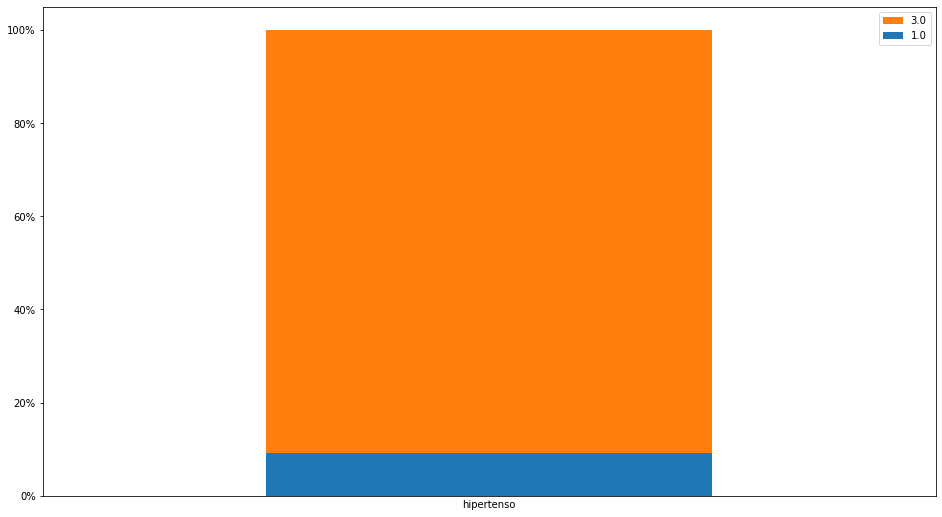

In [10]:
# create dummy variable then group by that
# set the legend to false because we'll fix it later
database.assign(dummy = 1).groupby(
  ['dummy','Q002']
).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).to_frame().unstack().plot(kind='bar',stacked=True,legend=False)

# or it'll show up as 'dummy' 
plt.xlabel("hipertenso")

# disable ticks in the x axis
plt.xticks([])

# fix the legend or it'll include the dummy variable
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)
correct_labels = reversed(database['Q002'].unique())

#plt.figure(figsize=(400,300))
plt.legend(reversed_handles,correct_labels)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

#1.0 - diagnosticado com hipertensão, 3.0 - não diagnosticado com hipertensão

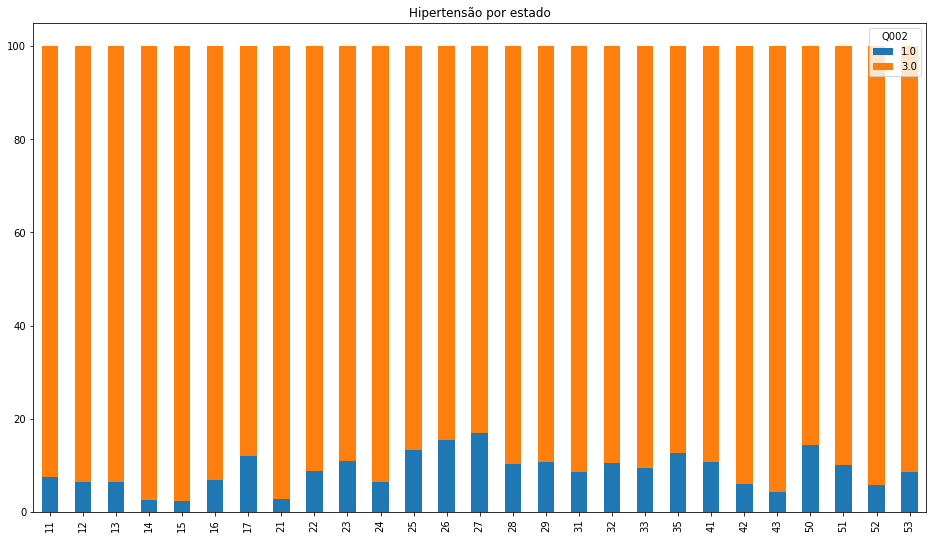

In [11]:
database.groupby(['V0001','Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.title('Hipertensão por estado')
plt.xlabel("")
plt.show()

# 11-17 Norte
#21-29 Nordeste
#31-33 Sudeste
#41-43 Sul
#50-53 Centro-Oeste (e DF)

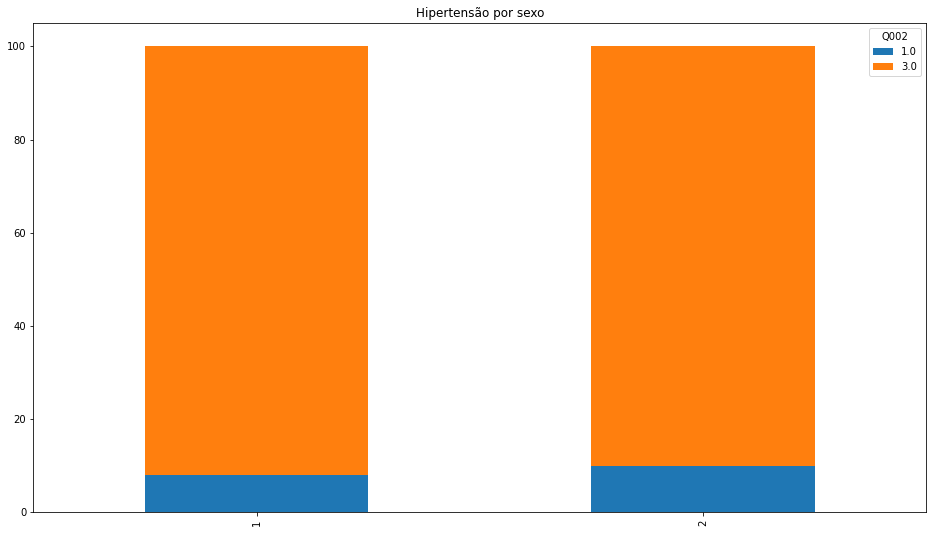

In [12]:
database.groupby(['C006','Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.title('Hipertensão por sexo')
plt.xlabel("")
plt.show()

# 1 - Masculino, 2 - Feminino

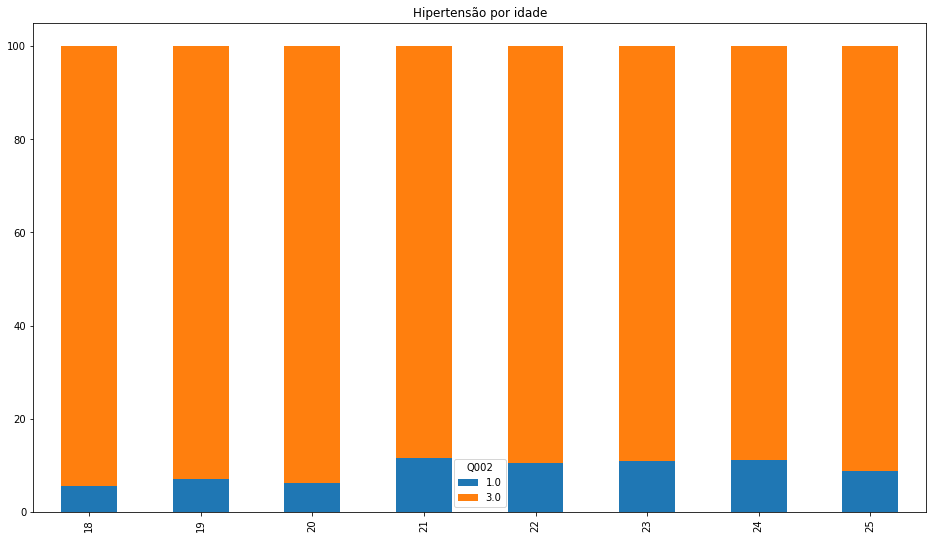

In [13]:
database.groupby(['C008','Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.title('Hipertensão por idade')
plt.xlabel("")
plt.show()

# Cortar acima de 25 anos

In [14]:
database['C008'].value_counts()

25    350
24    339
23    304
22    304
19    293
18    283
21    275
20    273
Name: C008, dtype: int64

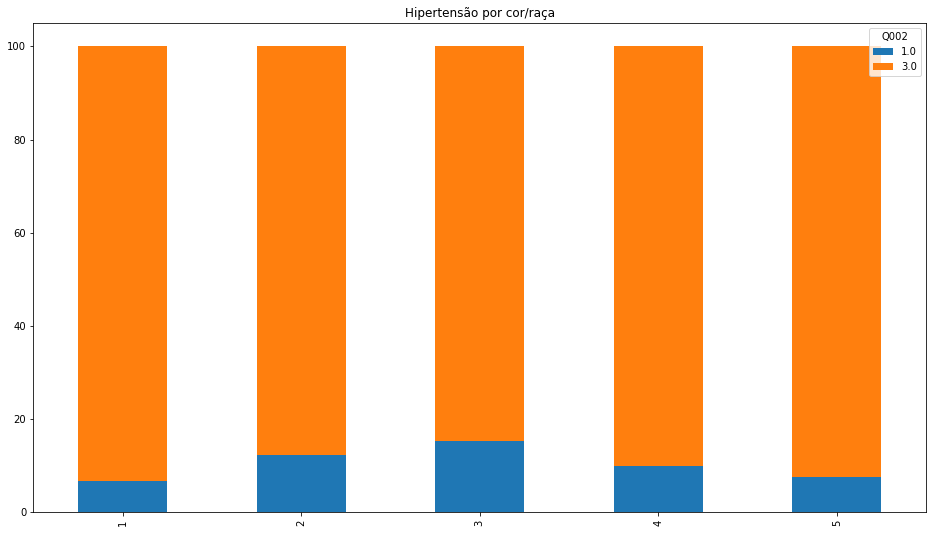

In [15]:
database.groupby(['C009','Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.title('Hipertensão por cor/raça')
plt.xlabel("")
plt.show()

# 1. Branca
# 2. Preta
# 3. Amarela
# 4. Parda e 5. Indígena -> juntar

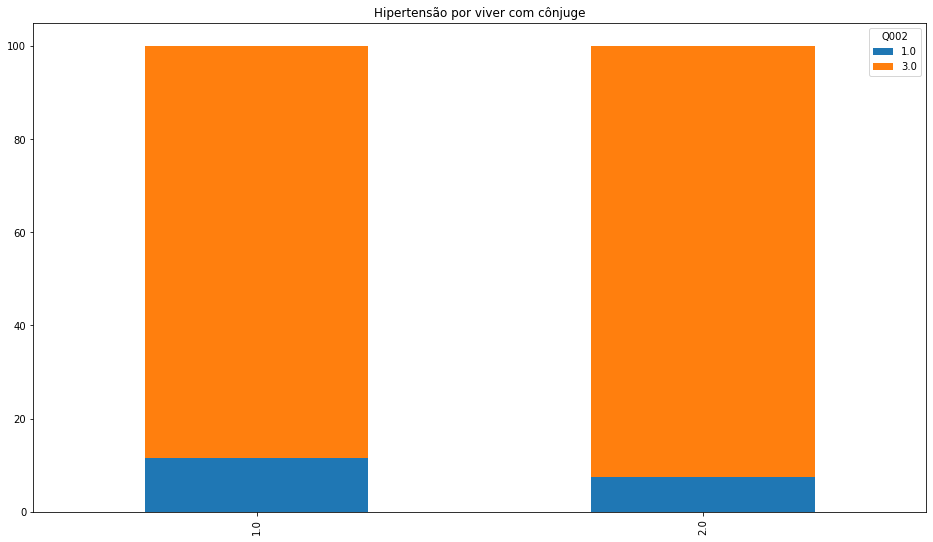

In [16]:
database.groupby(['C010','Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.title('Hipertensão por viver com cônjuge')
plt.xlabel("")
plt.show()

# 1. Sim
# 2. Não

In [17]:
database['C010'].value_counts()

2.0    1462
1.0     959
Name: C010, dtype: int64

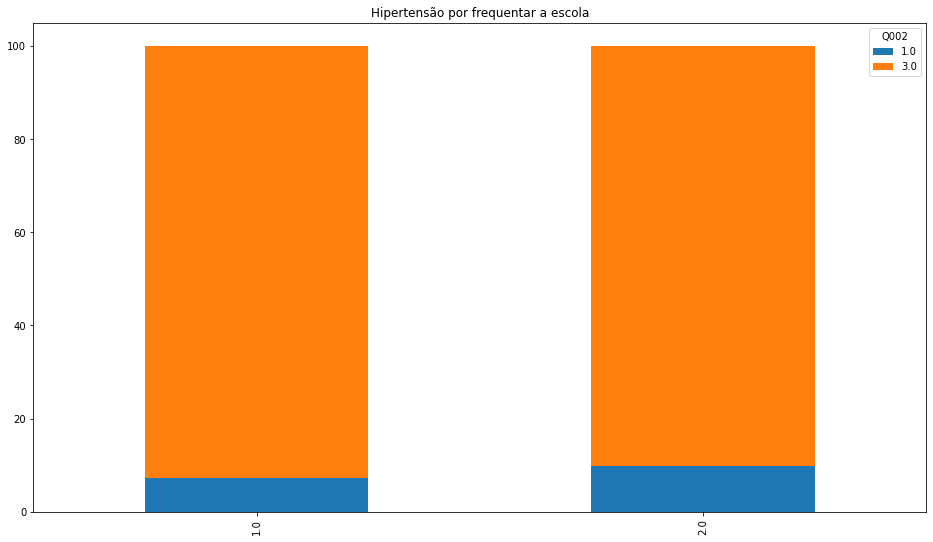

In [18]:
database.groupby(['D002','Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.title('Hipertensão por frequentar a escola')
plt.xlabel("")
plt.show()

# 1. Sim
# 2. Não

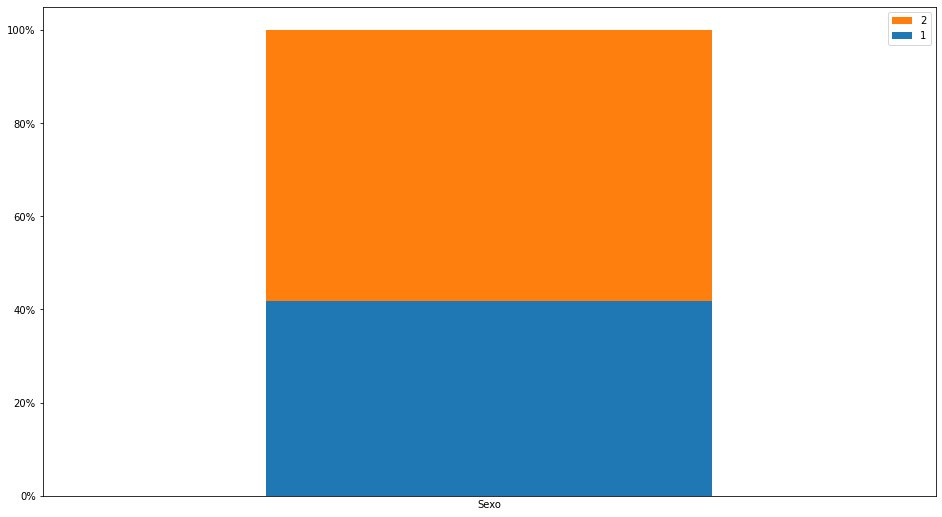

In [19]:
# create dummy variable then group by that
# set the legend to false because we'll fix it later
database.assign(dummy = 1).groupby(
  ['dummy','C006']
).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).to_frame().unstack().plot(kind='bar',stacked=True,legend=False)

# or it'll show up as 'dummy' 
plt.xlabel("Sexo")

# disable ticks in the x axis
plt.xticks([])

# fix the legend or it'll include the dummy variable
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)
correct_labels = database['C006'].unique()

#plt.figure(figsize=(400,300))
plt.legend(reversed_handles,correct_labels)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

#1.0 - diagnosticado com hipertensão, 3.0 - não diagnosticado com hipertensão

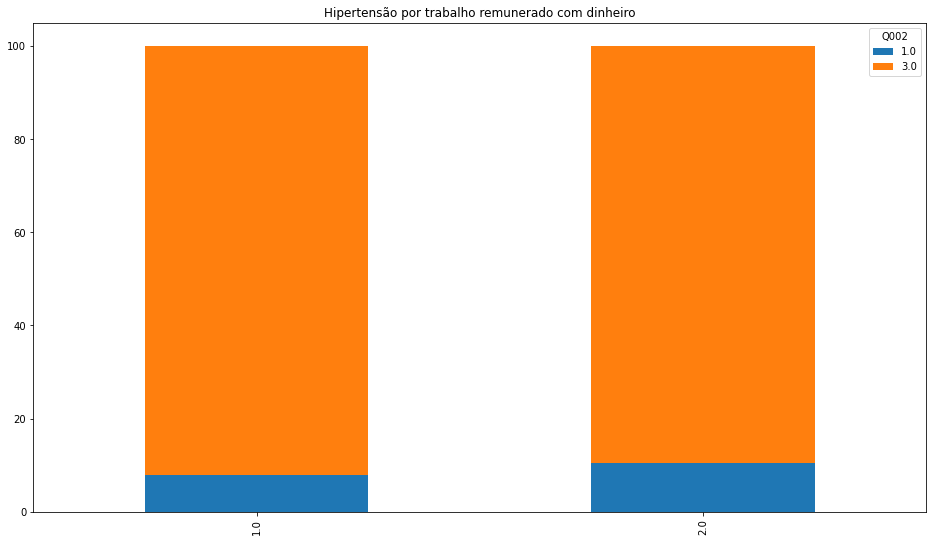

In [20]:
database.groupby(['E001', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.title('Hipertensão por trabalho remunerado com dinheiro')
plt.xlabel("")
plt.show()

# 1. Sim
# 2. Não

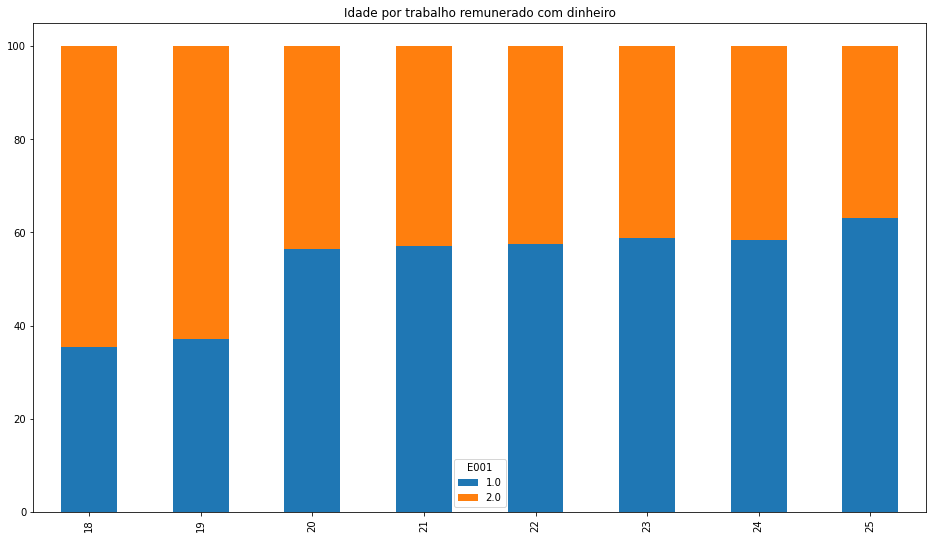

In [21]:
database.groupby(['C008', 'E001']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.title('Idade por trabalho remunerado com dinheiro')
plt.xlabel("")
plt.show()

# 1. Sim
# 2. Não

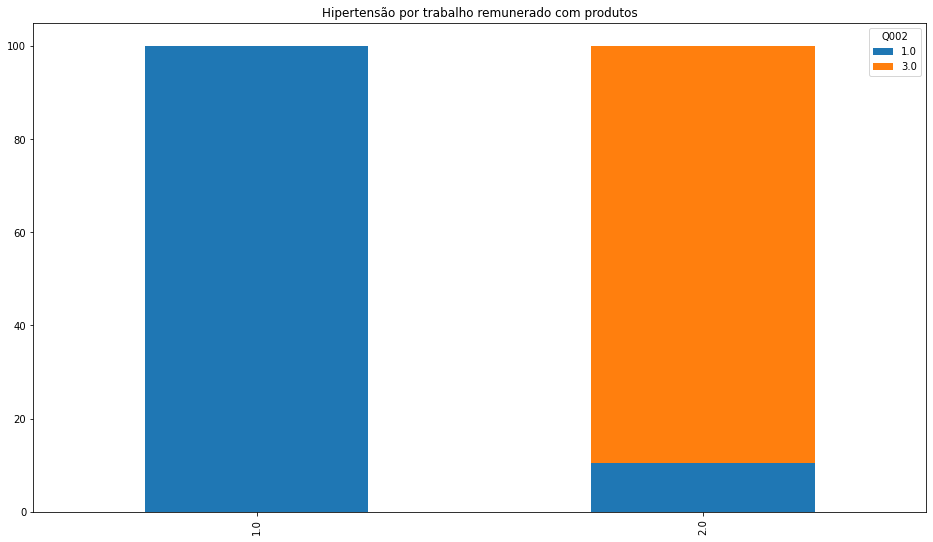

2.0    1127
1.0       1
Name: E002, dtype: int64


In [22]:
database.groupby(['E002', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.title('Hipertensão por trabalho remunerado com produtos')
plt.xlabel("")
plt.show()

# 1. Sim
# 2. Não
print(database['E002'].value_counts())

2.0    1073
1.0      54
Name: E003, dtype: int64


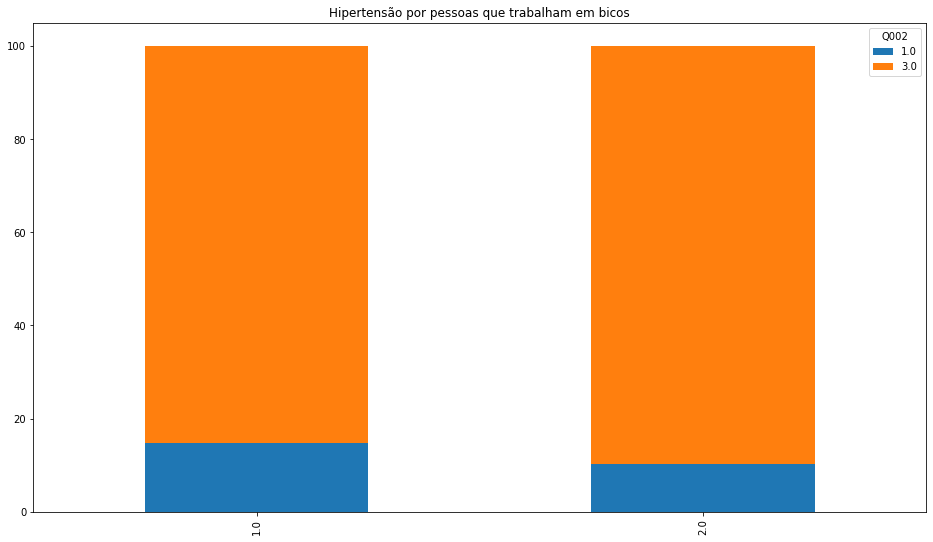

In [23]:
print(database['E003'].value_counts())
database.groupby(['E003', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.title('Hipertensão por pessoas que trabalham em bicos')
plt.xlabel("")
plt.show()

# 1. Sim
# 2. Não

1.0    1363
2.0      26
3.0       4
Name: E011, dtype: int64


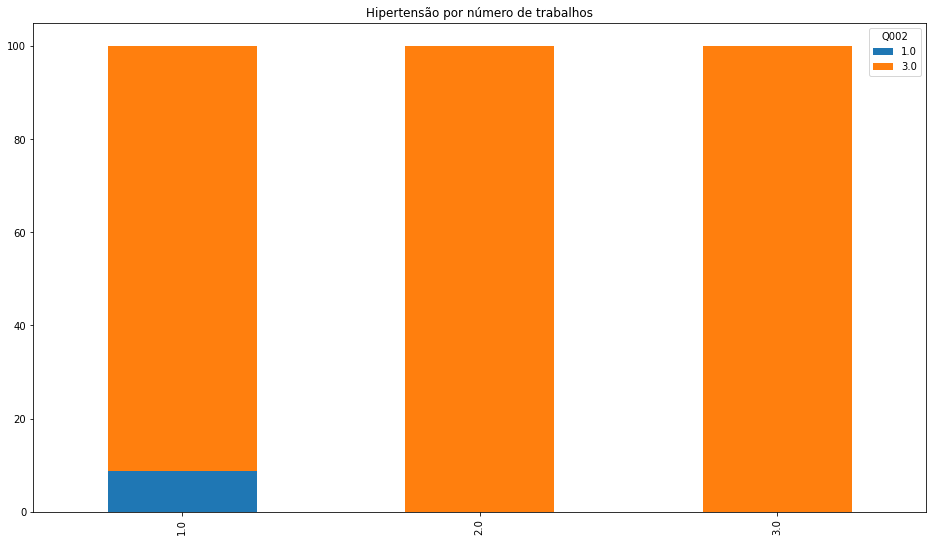

In [24]:
print(database['E011'].value_counts())
database.groupby(['E011', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.title('Hipertensão por número de trabalhos')
plt.xlabel("")
plt.show()

3.0    918
6.0    211
4.0    128
1.0     70
7.0     25
5.0     20
2.0     18
8.0      3
Name: E014, dtype: int64


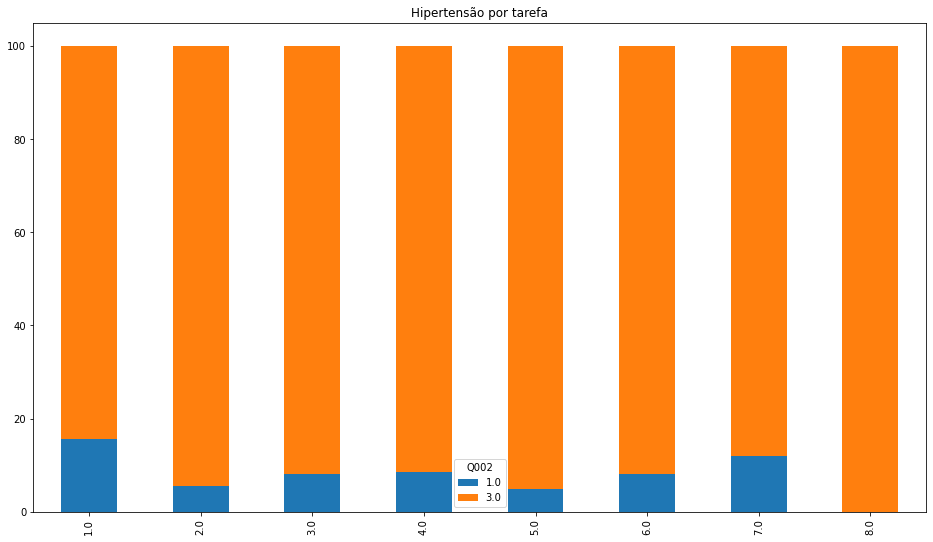

In [25]:
print(database['E014'].value_counts())
database.groupby(['E014', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.title('Hipertensão por tarefa')
plt.xlabel("")
plt.show()

# 1. Trabalhador doméstico
# 2. Militar do exército, da marinha, da aeronáutica, da polícia militar ou do corpo de bombeiros militar
# 3. Empregado do setor privado
# 4. Empregado do setor público (inclusive empresas de economia mista)
# 5. Empregador
# 6. Conta própria
# 7. Trabalhador não remunerado em ajuda a conta própria ou empregador que era membro do domicílio
# 8. Trabalhador não remunerado em ajuda a empregado que era membro do domicílio

.      2382
020       7
012       3
016       3
030       2
003       2
006       2
024       1
002       1
005       1
018       1
036       1
009       1
008       1
025       1
004       1
021       1
048       1
Name: E019, dtype: int64


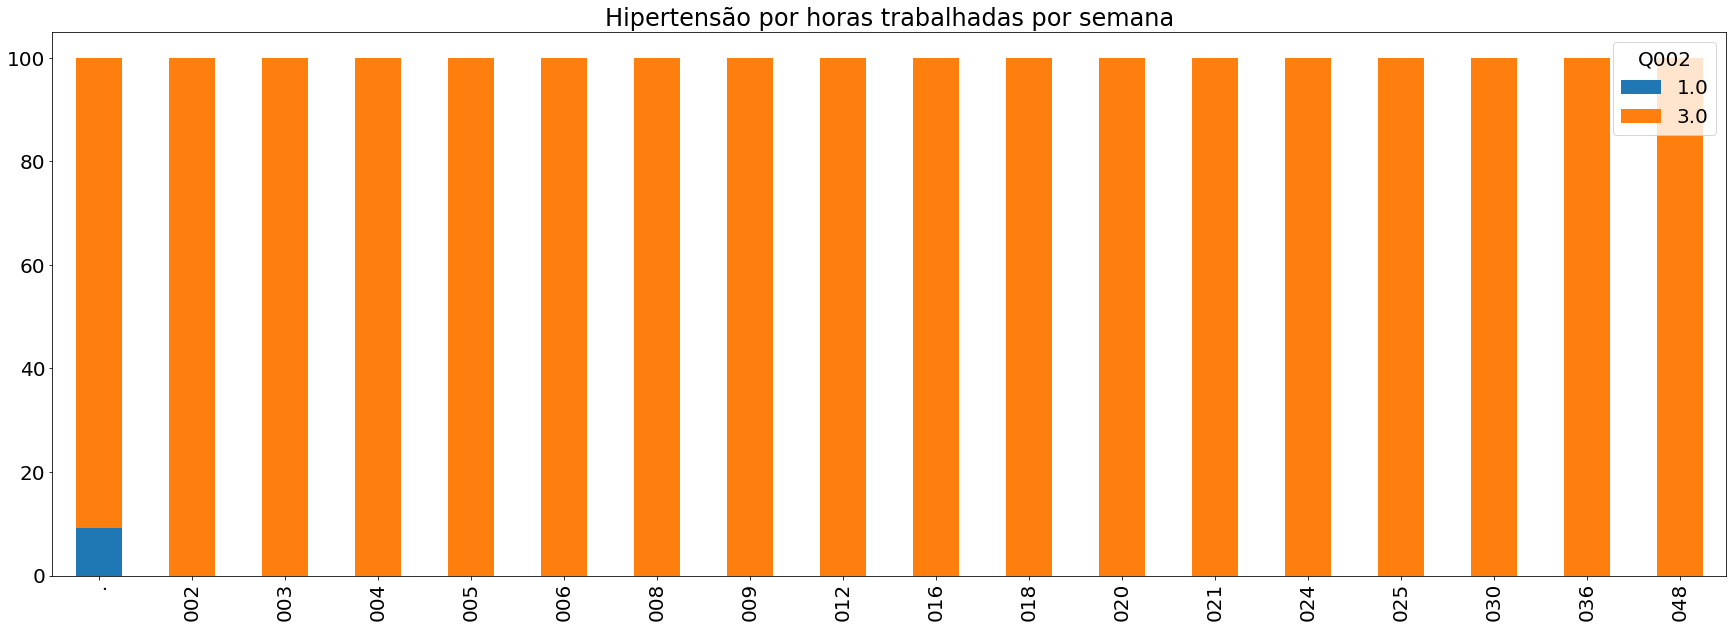

In [68]:
print(database['E019'].value_counts())
database.groupby(['E019', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por horas trabalhadas por semana')
plt.xlabel("")
plt.show()

# 1. Trabalhador doméstico
# 2. Militar do exército, da marinha, da aeronáutica, da polícia militar ou do corpo de bombeiros militar
# 3. Empregado do setor privado
# 4. Empregado do setor público (inclusive empresas de economia mista)
# 5. Empregador
# 6. Conta própria
# 7. Trabalhador não remunerado em ajuda a conta própria ou empregador que era membro do domicílio
# 8. Trabalhador não remunerado em ajuda a empregado que era membro do domicílio

2    1882
1     539
Name: I001, dtype: int64


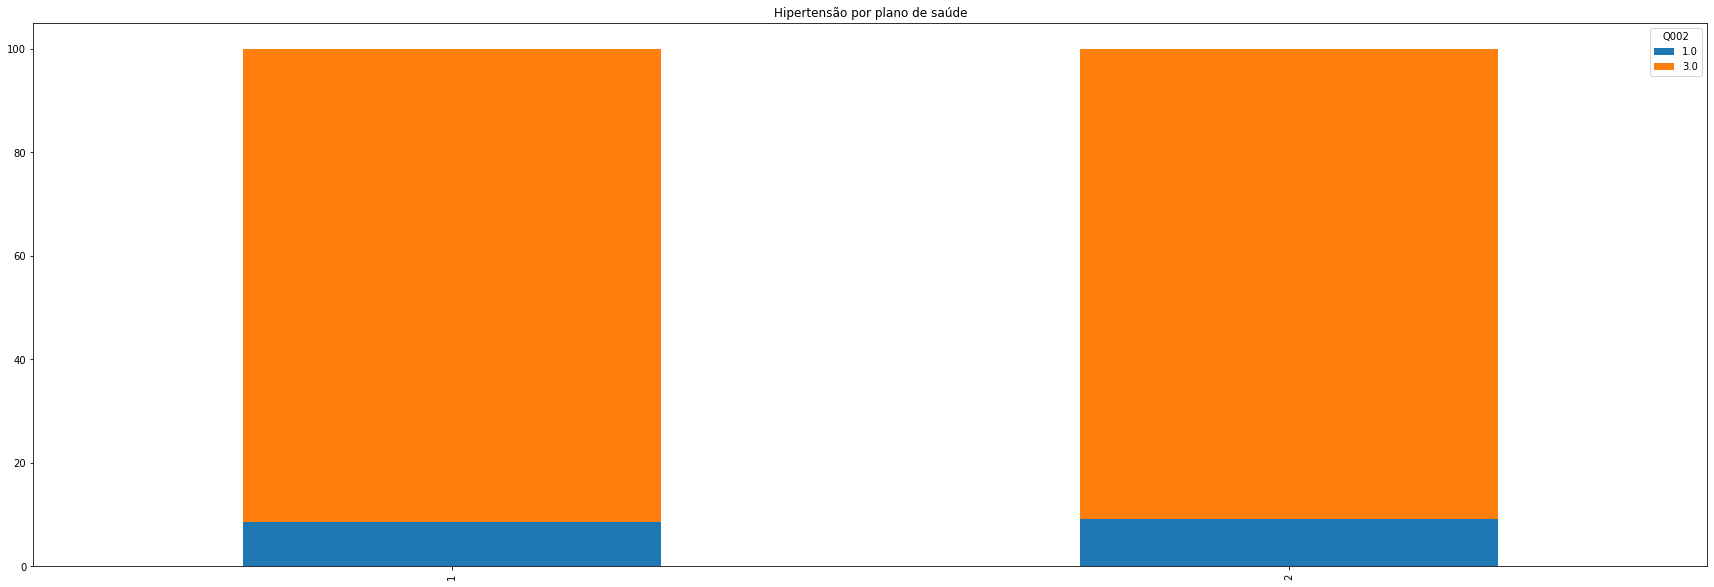

In [27]:
print(database['I001'].value_counts())
database.groupby(['I001', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por plano de saúde')
plt.xlabel("")
plt.show()

# 1. Tem plano de saúde
# 2. Não tem plano de saúde

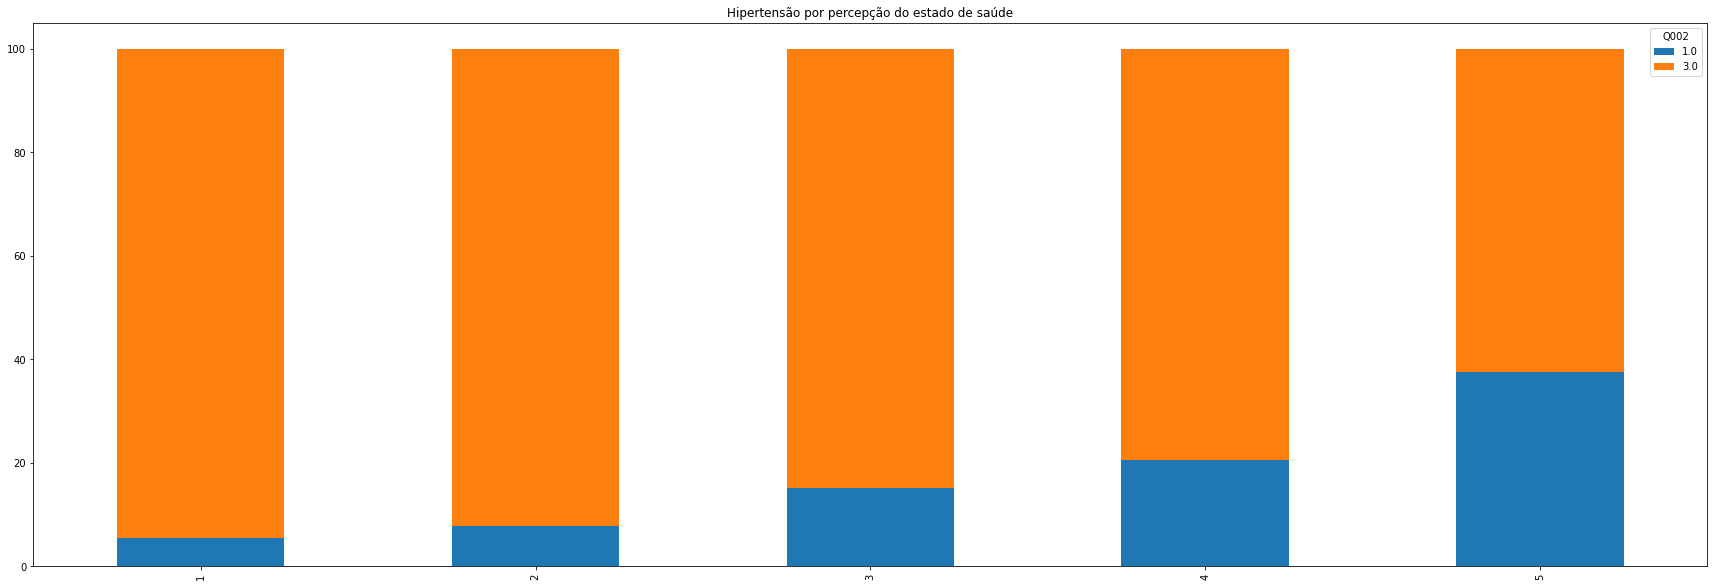

In [28]:
database.groupby(['J001', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por percepção do estado de saúde')
plt.xlabel("")
plt.show()

# 1. Muito bom
# 2. Bom
# 3. Regular
# 4. Ruim
# 5. Muito ruim

1    1746
2     367
4     171
3     128
5       9
Name: J011, dtype: int64


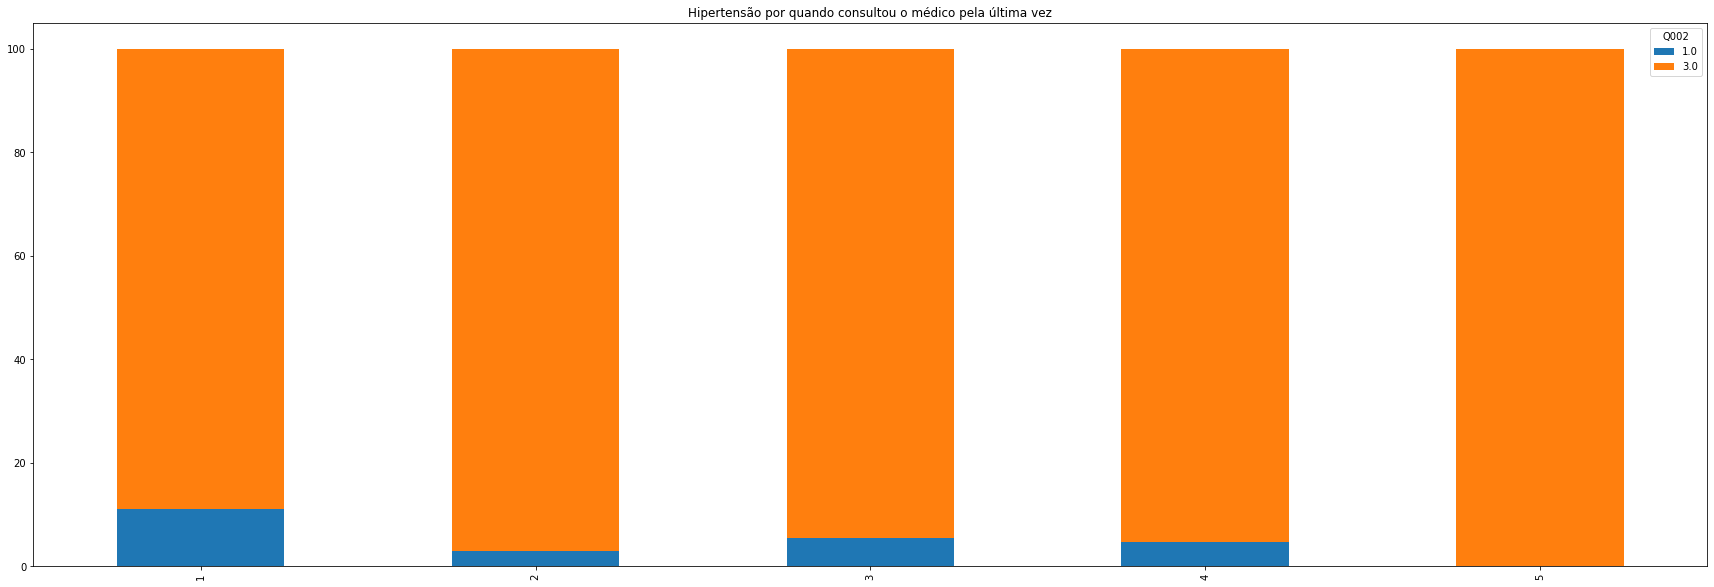

In [29]:
print(database['J011'].value_counts())
database.groupby(['J011', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por quando consultou o médico pela última vez')
plt.xlabel("")
plt.show()

# 1. Nos doze últimos meses
# 2. De 1 ano a menos de 2 anos
# 3. De 2 anos a menos de 3 anos
# 4. 3 anos ou mais
# 5. Nunca foi ao médico

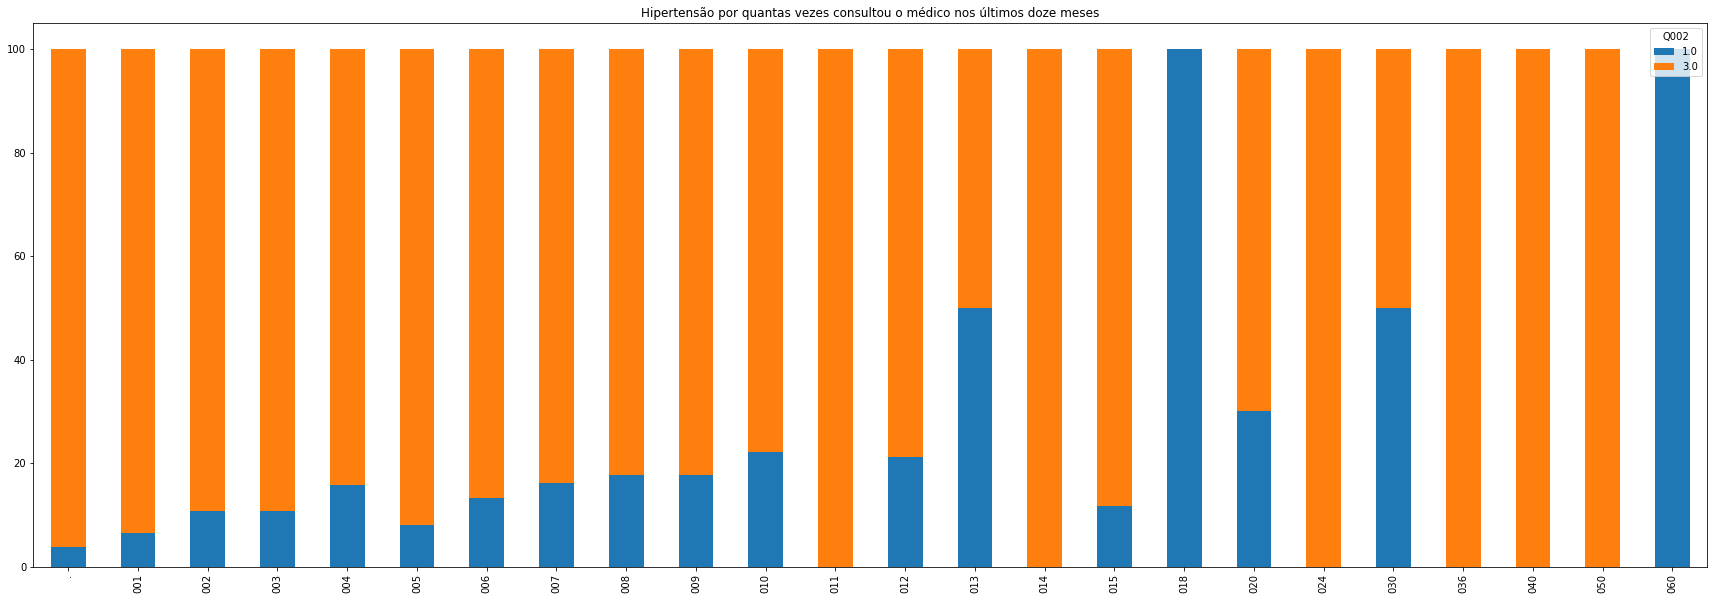

In [30]:
database.groupby(['J012', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por quantas vezes consultou o médico nos últimos doze meses')
plt.xlabel("")
plt.show()

6.0    101
4.0     56
2.0     20
5.0     15
3.0     10
1.0      8
Name: M006, dtype: int64


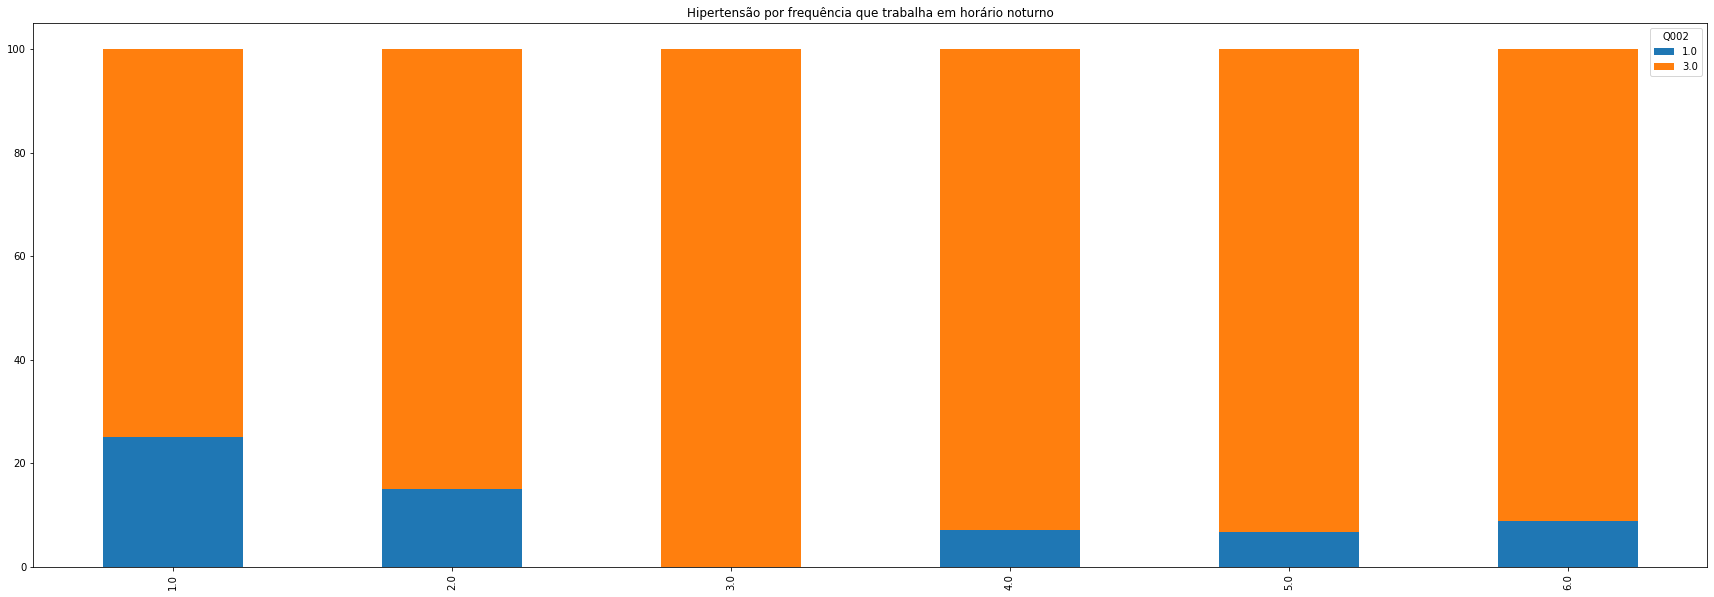

In [31]:
print(database['M006'].value_counts())
database.groupby(['M006', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por frequência que trabalha em horário noturno')
plt.xlabel("")
plt.show()

# 1. Menos de 1 vez por mês
# 2. De 1 a 3 vezes por mês
# 3. 1 vez por semana
# 4. 2 a 3 vezes por semana
# 5. 4 vezes por semana
# 6. 5 vezes ou mais por semana

2.0    2404
1.0      17
Name: M007, dtype: int64


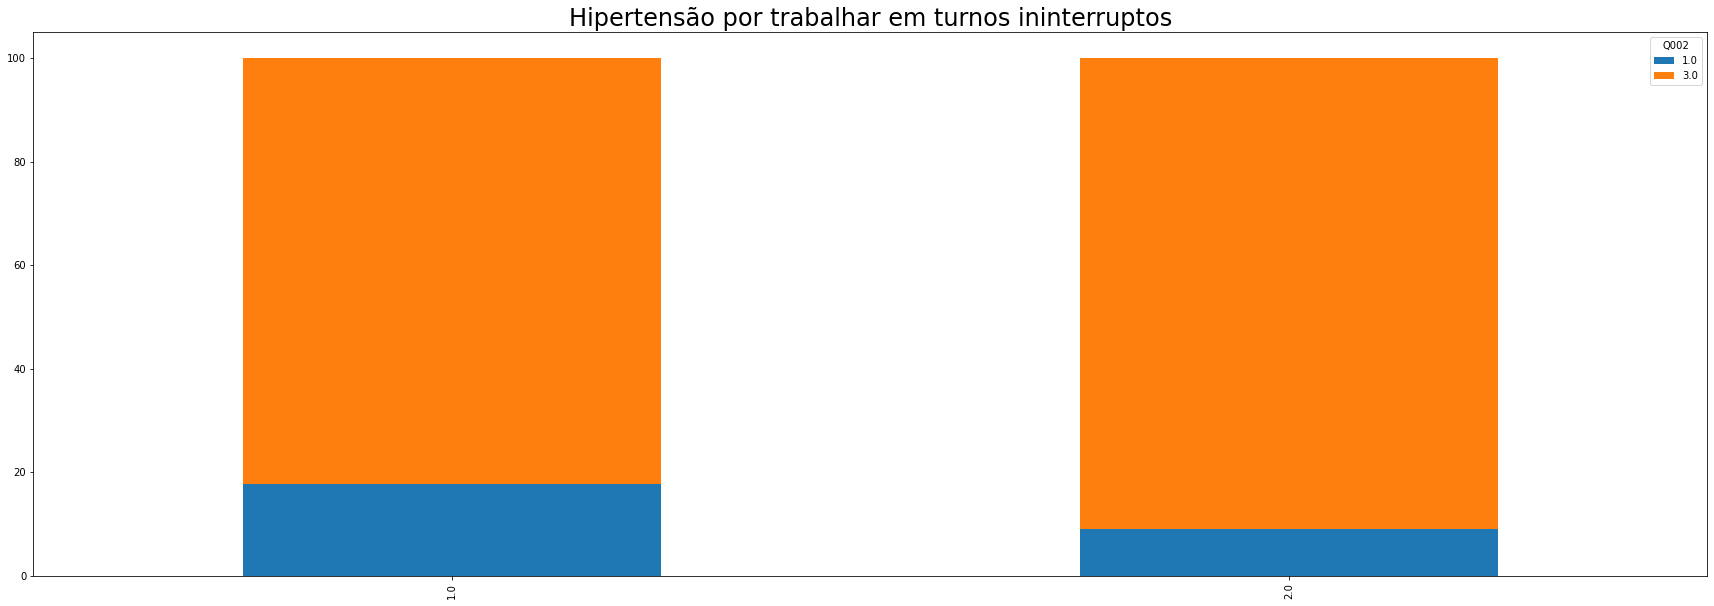

In [32]:
database['M007'].fillna(value=2, inplace=True)
print(database['M007'].value_counts())
database.groupby(['M007', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.rcParams['font.size'] = 20
plt.title('Hipertensão por trabalhar em turnos ininterruptos')
plt.xlabel("")
plt.show()

# 1. Trabalha em turnos ininterruptos
# 2. Não trabalha em turnos ininterruptos

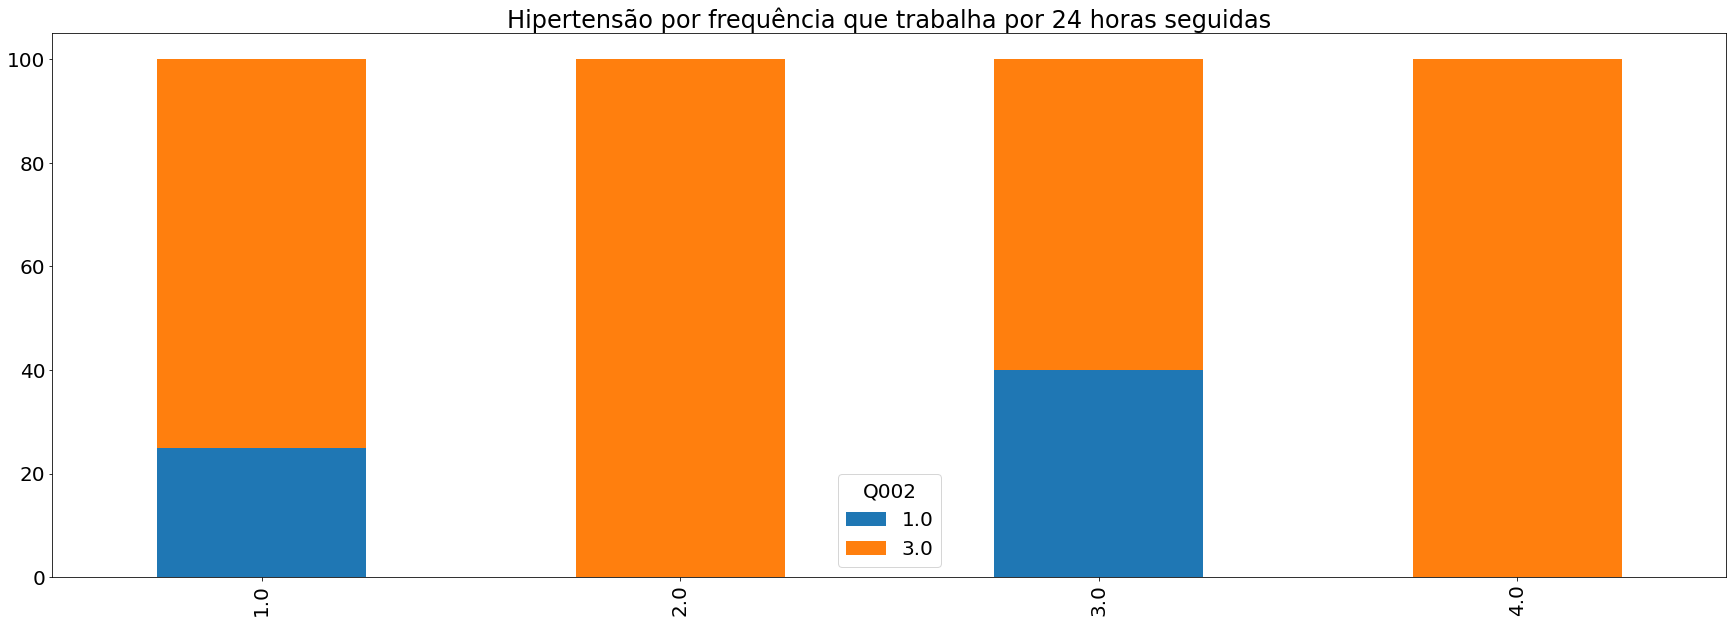

In [33]:
database.groupby(['M008', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por frequência que trabalha por 24 horas seguidas')
plt.xlabel("")
plt.show()

# 1. Menos de 1 vez por mês
# 2. De 1 a 3 vezes por mês
# 3. 1 vez por semana
# 4. 2 a 3 vezes por semana
# 5. 4 vezes por semana
# 6. 5 vezes ou mais por semana

1.0    785
2.0    351
3.0    257
Name: M009, dtype: int64


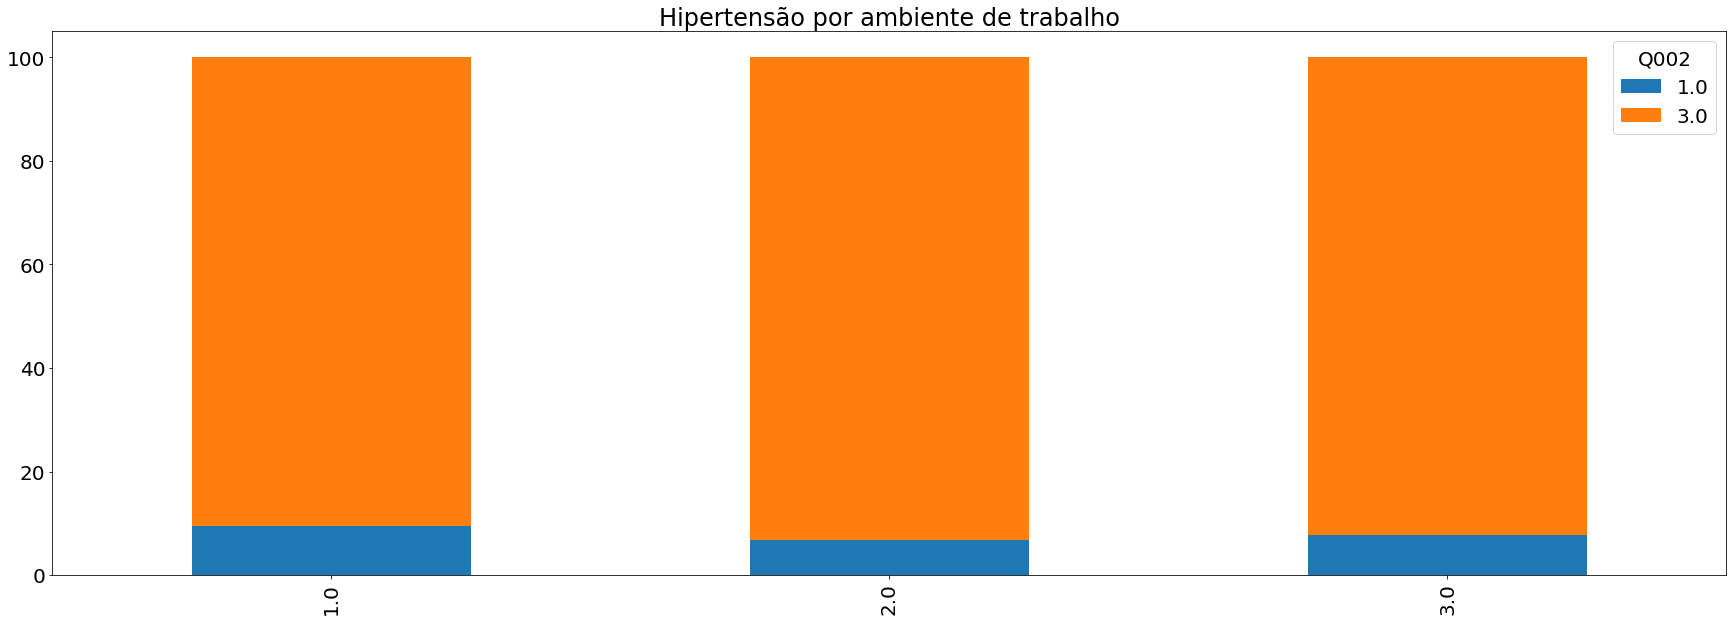

In [34]:
print(database['M009'].value_counts())
database.groupby(['M009', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por ambiente de trabalho')
plt.xlabel("")
plt.show()

# 1. Fechado
# 2. Aberto
# 3. Ambos

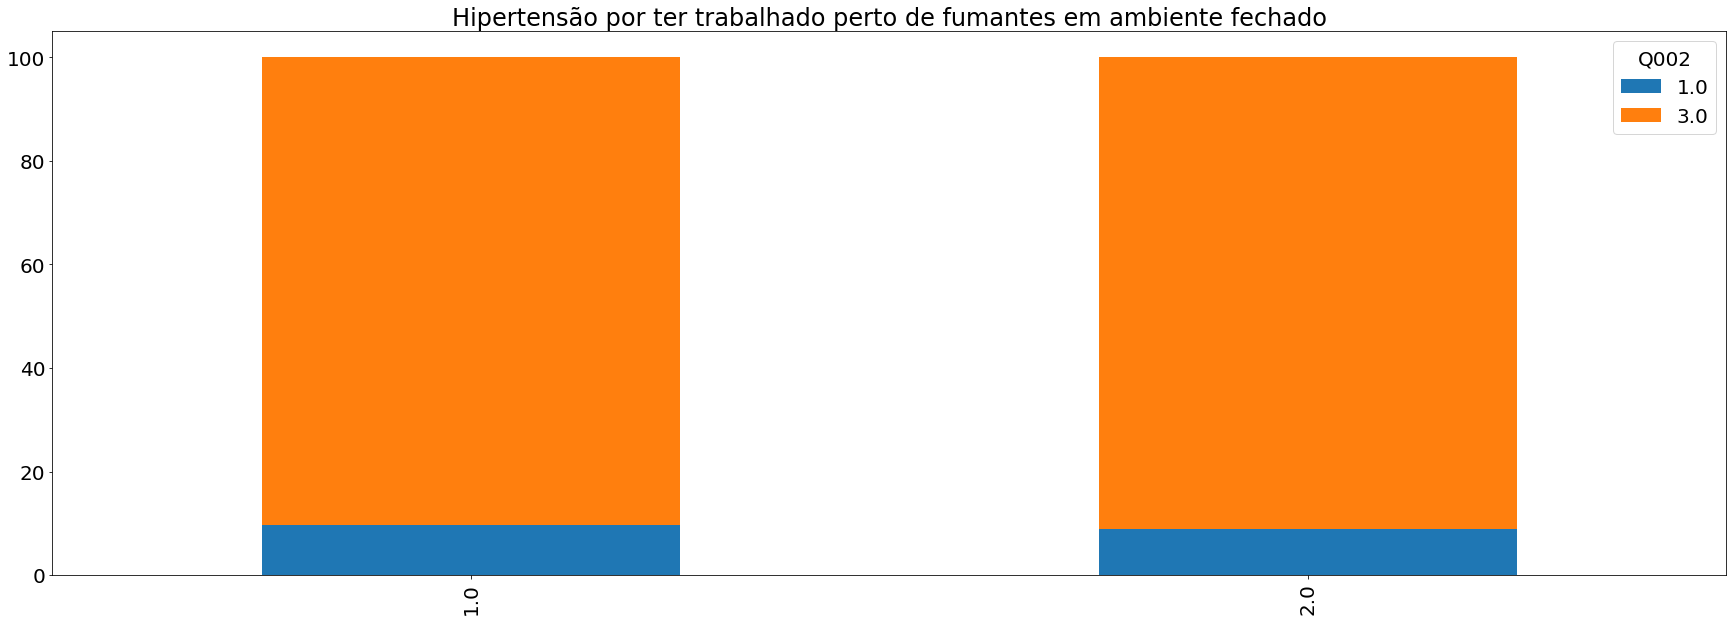

In [35]:
database.groupby(['M010', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por ter trabalhado perto de fumantes em ambiente fechado')
plt.xlabel("")
plt.show()

# 1. Sim
# 2. Não

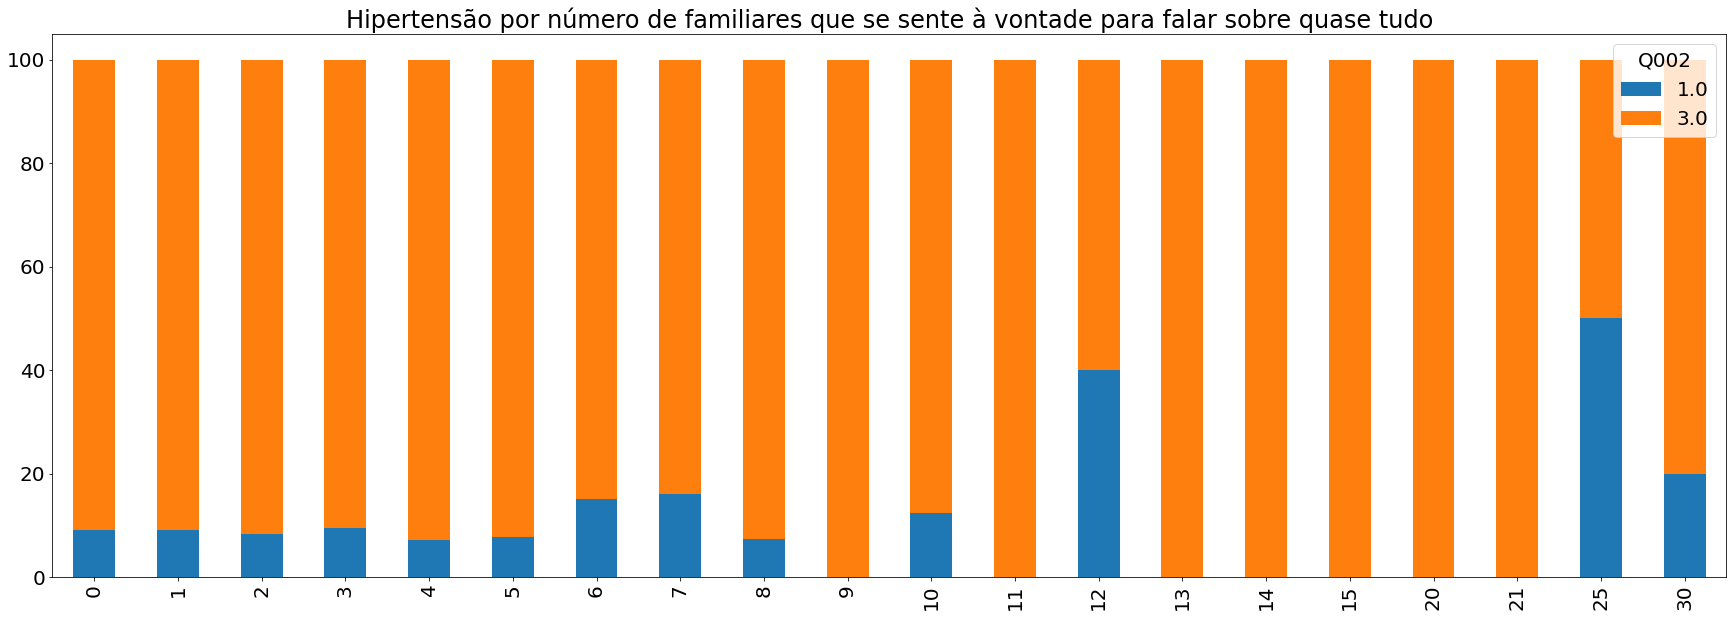

In [36]:
database.groupby(['M014', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por número de familiares que se sente à vontade para falar sobre quase tudo')
plt.xlabel("")
plt.show()

### 

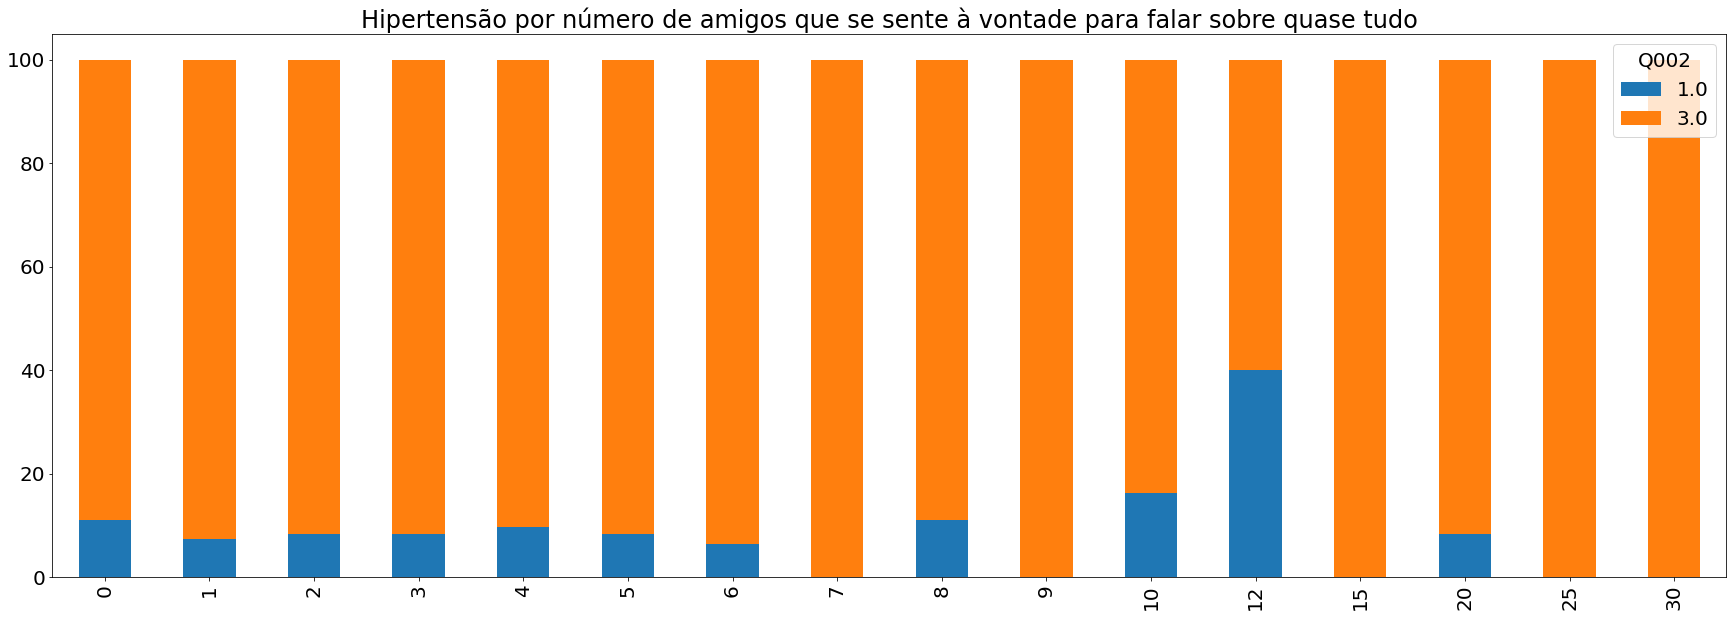

In [37]:
database.groupby(['M015', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por número de amigos que se sente à vontade para falar sobre quase tudo')
plt.xlabel("")
plt.show()

6.0    1487
1.0     401
2.0     216
4.0     170
3.0      99
5.0      48
Name: M016, dtype: int64 [6. 5. 4. 1. 2. 3.]


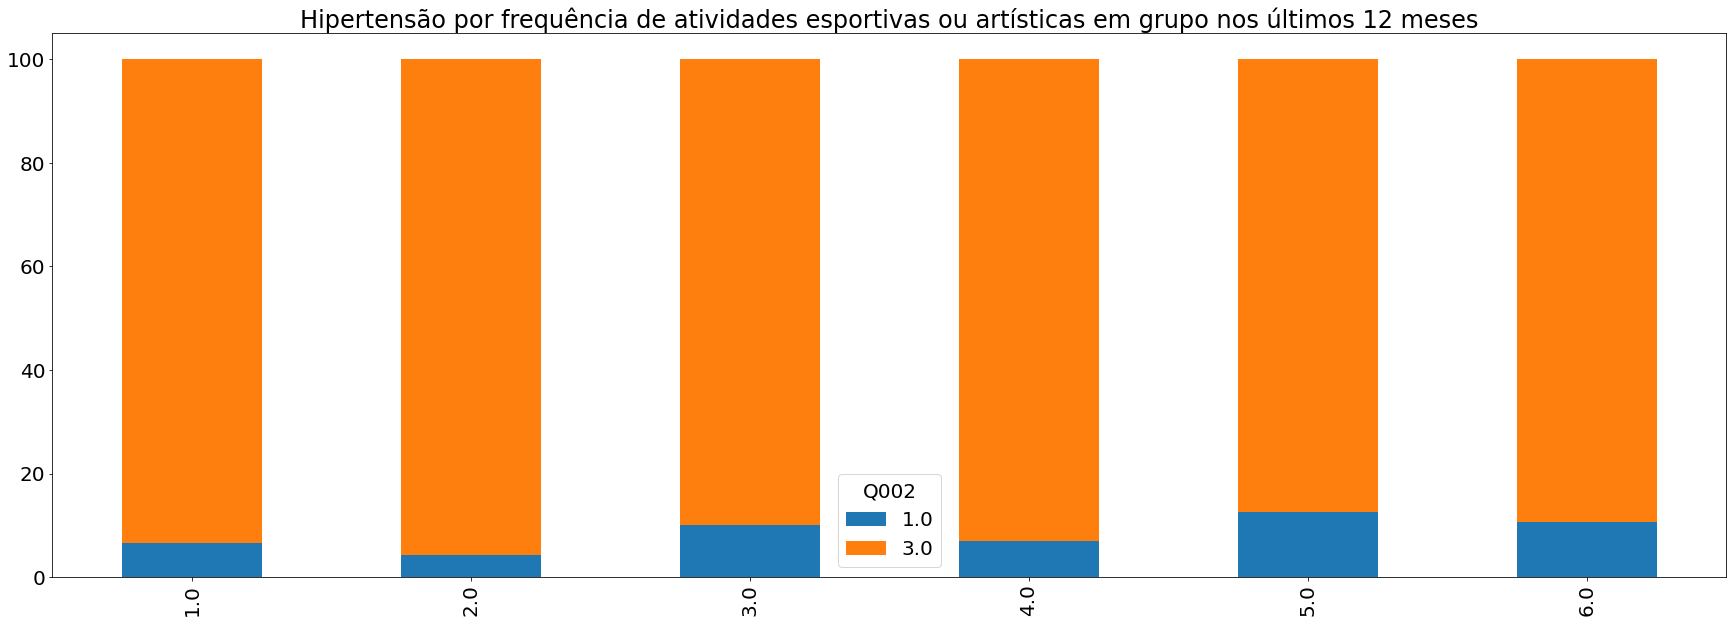

In [38]:
print(database['M016'].value_counts(), database['M016'].unique())
database.groupby(['M016', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por frequência de atividades esportivas ou artísticas em grupo nos últimos 12 meses')
plt.xlabel("")
plt.show()

# 1. Mais de uma vez por semana 
# 2. Uma vez por semana 
# 3. De 2 a 3 vezes por mês
#juntar ^v
# 4. Algumas vezes no ano
# 5. Uma vez no ano
# 6. Nenhuma vez

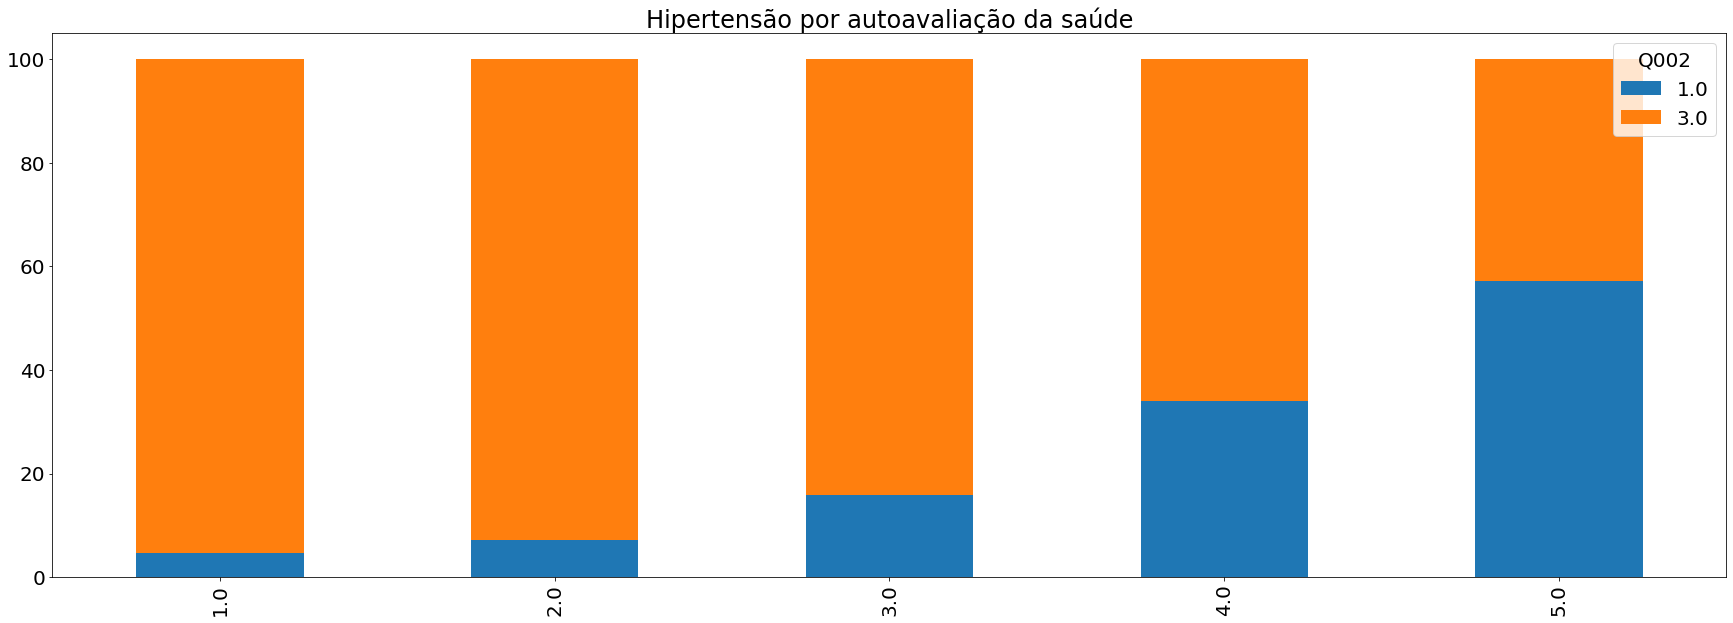

In [39]:
database.groupby(['N001', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por autoavaliação da saúde')
plt.xlabel("")
plt.show()

# 1. Muito boa
# 2. Boa
# 3. Regular
# 4. Ruim
# 5. Muito ruim

2.0    2407
1.0      14
Name: N002, dtype: int64 [2. 1.]


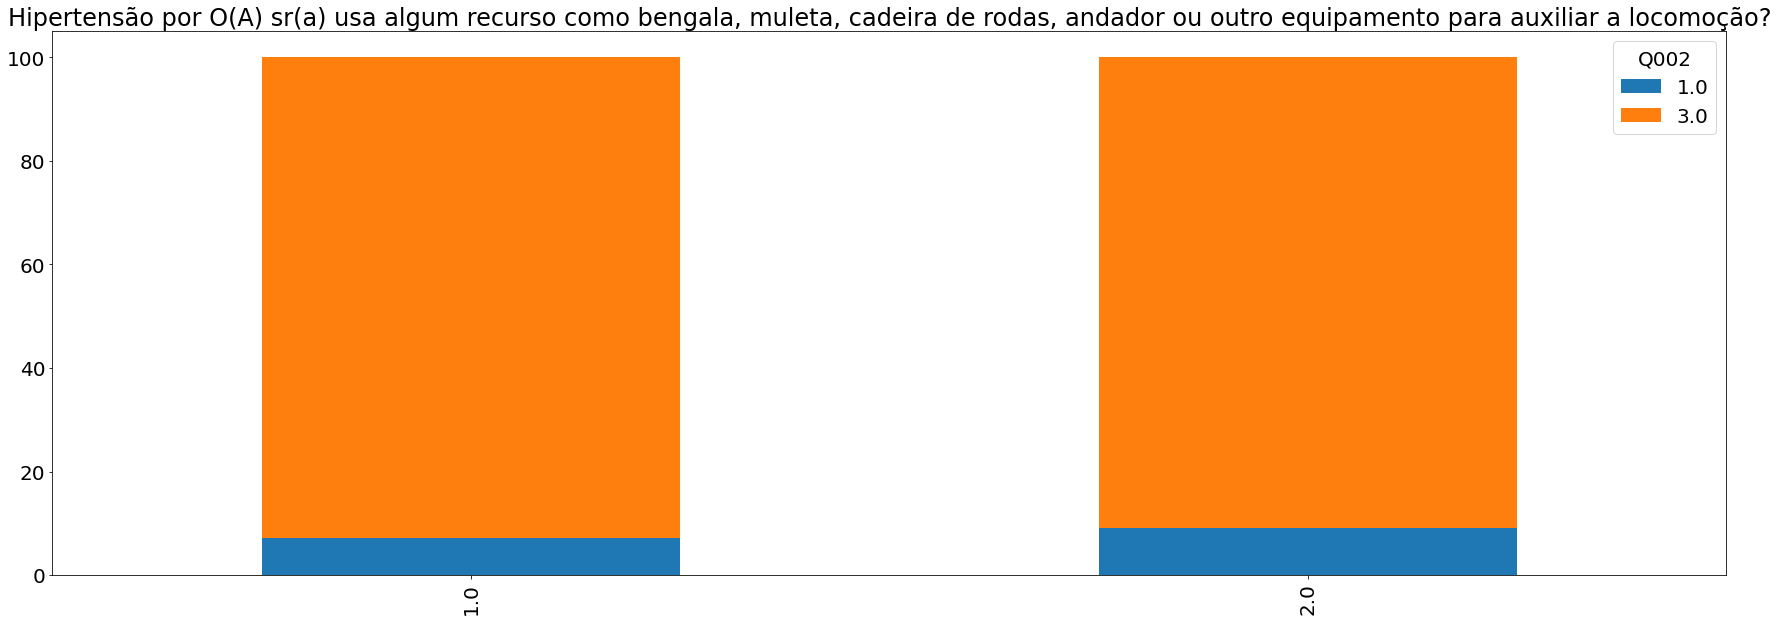

In [40]:
print(database['N002'].value_counts(), database['N002'].unique())
database.groupby(['N002', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por O(A) sr(a) usa algum recurso como bengala, muleta, cadeira de rodas, andador ou outro equipamento para auxiliar a locomoção?')
plt.xlabel("")
plt.show()

# 1. Sim
# 2. Não

1.0    2357
2.0      23
5.0      20
3.0      17
4.0       4
Name: N003, dtype: int64 [1. 3. 5. 2. 4.]


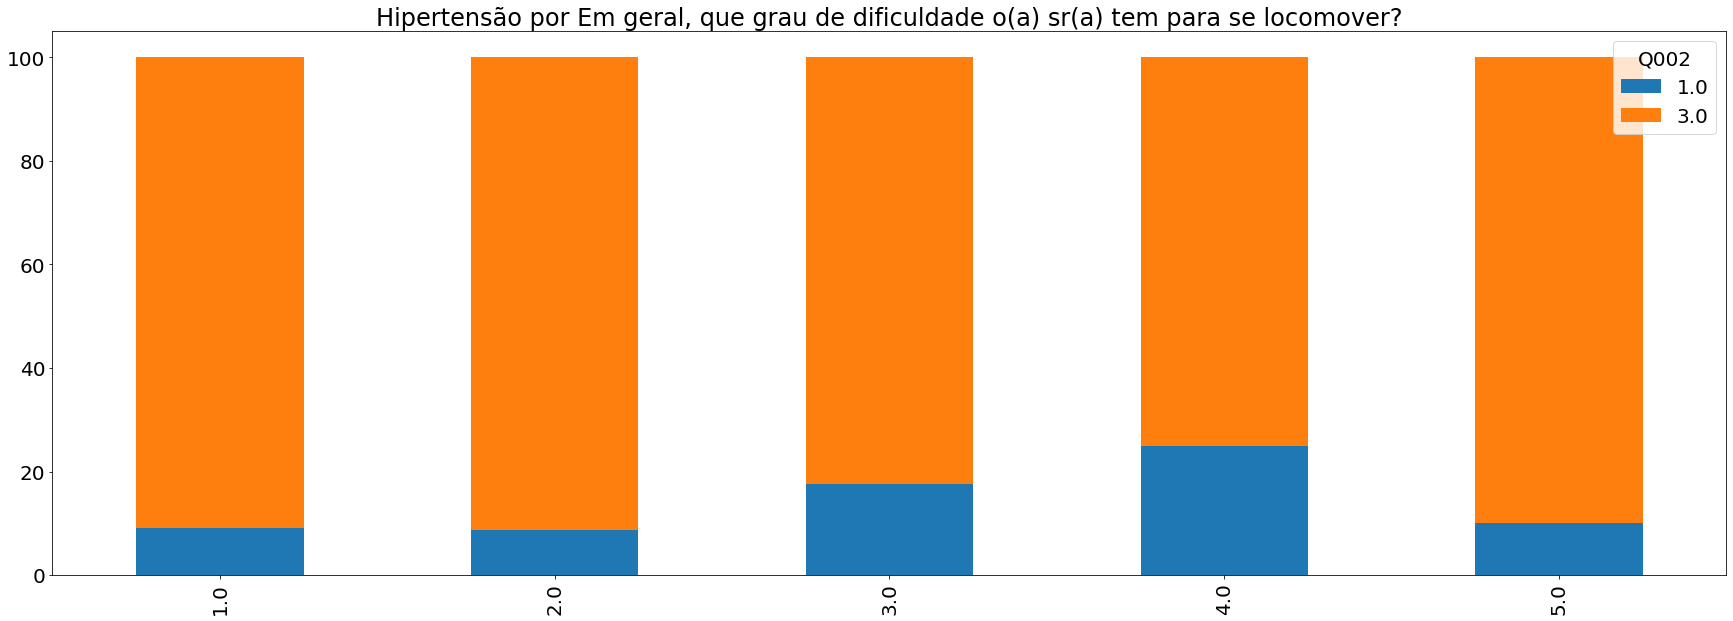

In [41]:
print(database['N003'].value_counts(), database['N003'].unique())
database.groupby(['N003', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por Em geral, que grau de dificuldade o(a) sr(a) tem para se locomover?')
plt.xlabel("")
plt.show()

#1. Nenhum
#2. Leve
#3. Médio
#4. Intenso
#5. Não consegue

2.0    2173
1.0     224
3.0       4
Name: N004, dtype: int64 [ 2.  1. nan  3.]


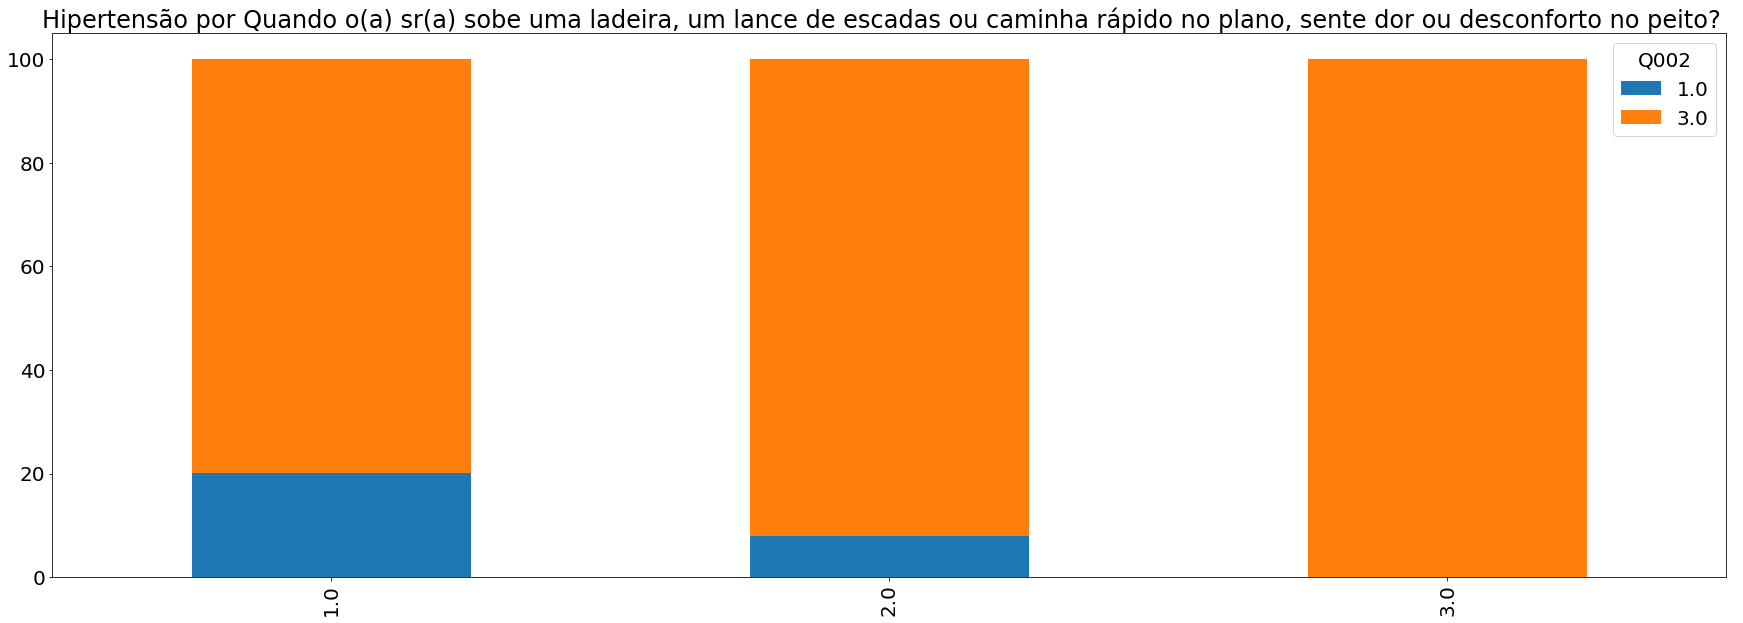

In [42]:
print(database['N004'].value_counts(), database['N004'].unique())
database.groupby(['N004', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por Quando o(a) sr(a) sobe uma ladeira, um lance de escadas ou caminha rápido no plano, sente dor ou desconforto no peito?  ')
plt.xlabel("")
plt.show()

#1. Sim
#2. Não
#3. Não se aplica

2.0    2337
1.0      60
Name: N005, dtype: int64 [ 2.  1. nan]


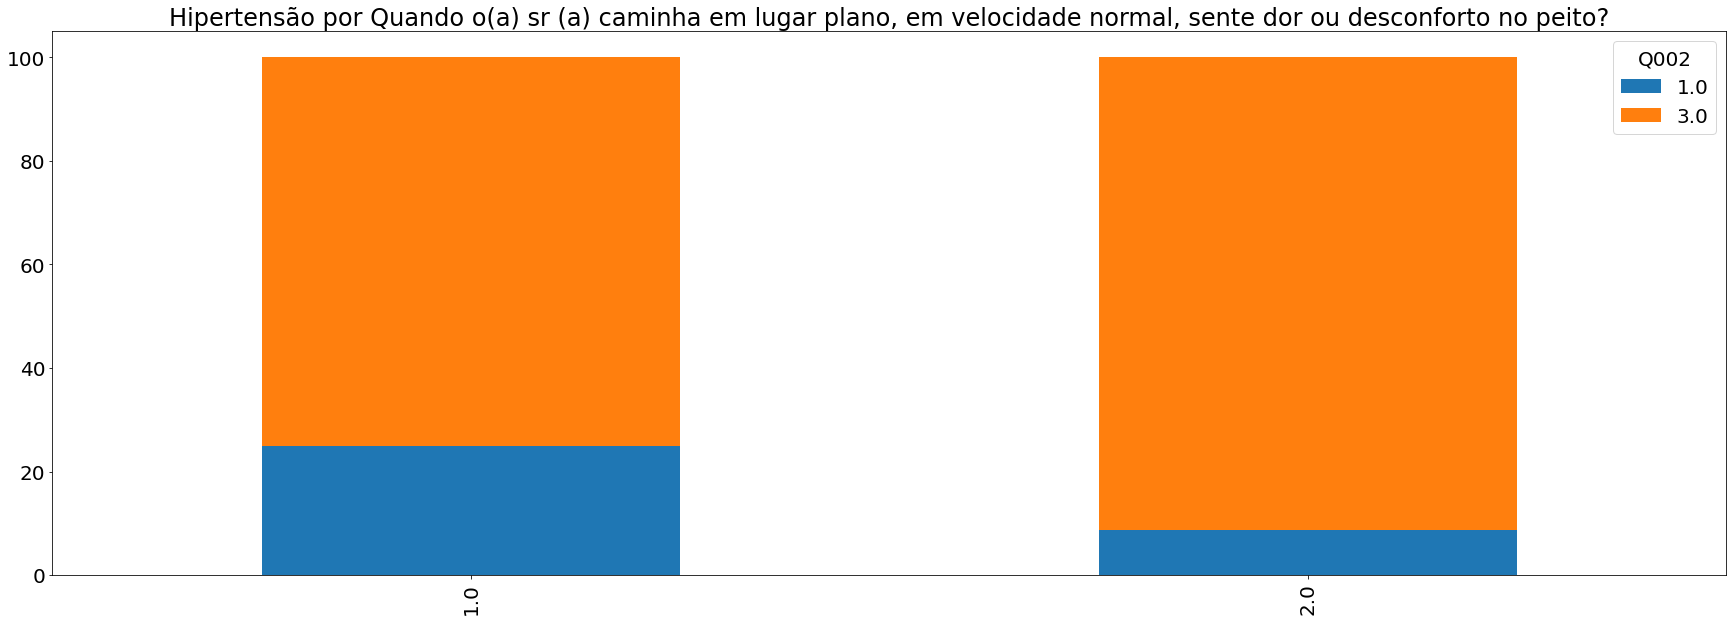

In [43]:
print(database['N005'].value_counts(), database['N005'].unique())
database.groupby(['N005', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por Quando o(a) sr (a) caminha em lugar plano, em velocidade normal, sente dor ou desconforto no peito?')
plt.xlabel("")
plt.show()

#1. Sim
#2. Não

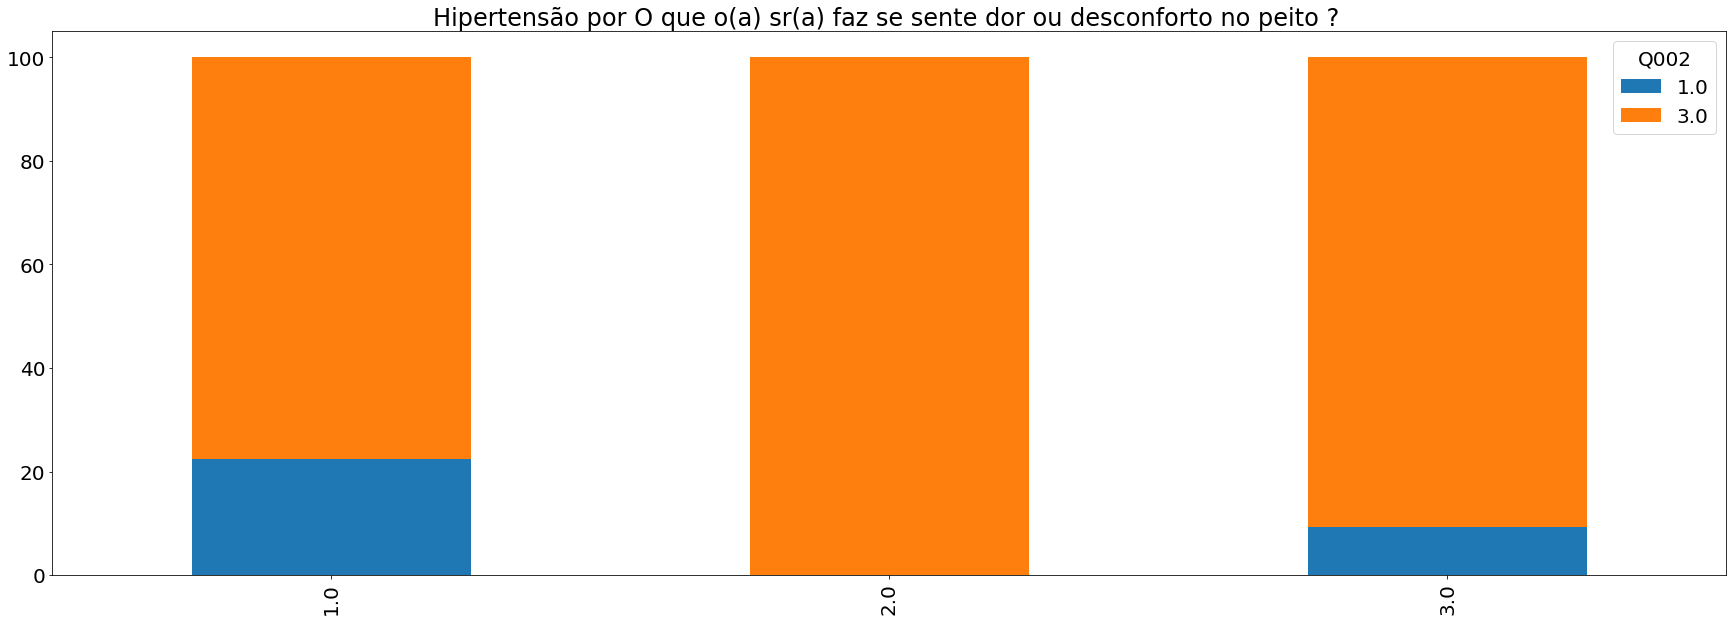

In [44]:
database.groupby(['N006', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por O que o(a) sr(a) faz se sente dor ou desconforto no peito ? ')
plt.xlabel("")
plt.show()

#1. Para ou diminui a velocidade
#2. Continua após tomar um remédio que dissolve na boca para aliviar a dor
#3. Continua caminhado

1.0    1849
2.0     299
4.0     185
3.0      88
Name: N010, dtype: int64 [1. 2. 4. 3.]


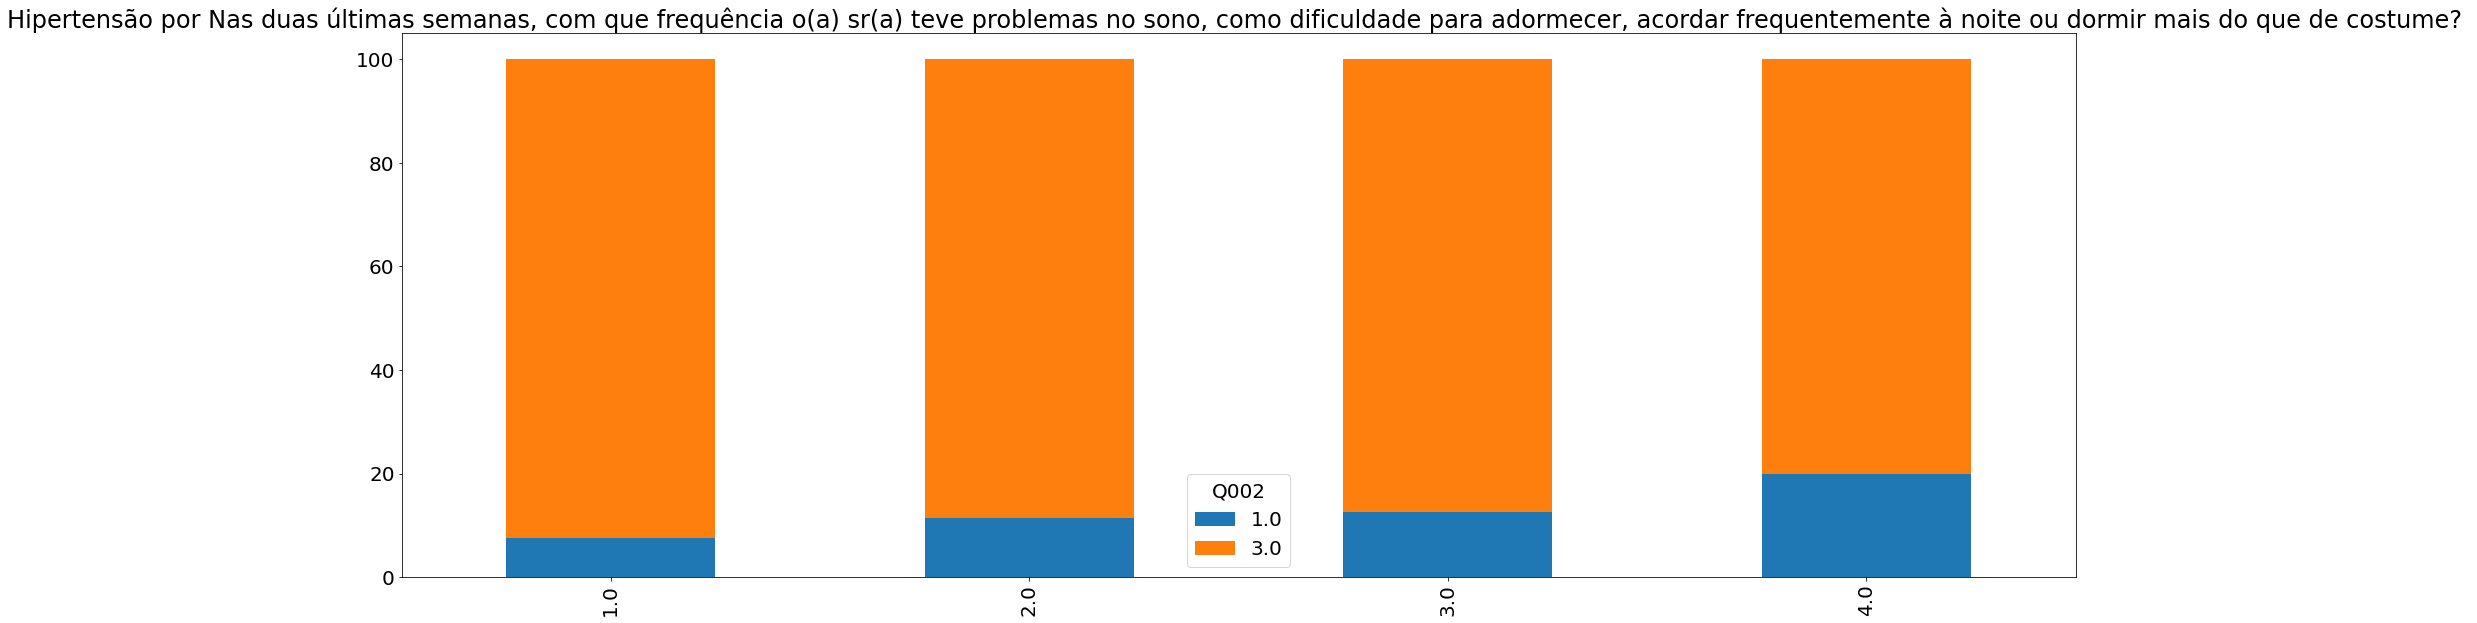

In [45]:
print(database['N010'].value_counts(), database['N010'].unique())
database.groupby(['N010', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por Nas duas últimas semanas, com que frequência o(a) sr(a) teve problemas no sono, como dificuldade para adormecer, acordar frequentemente à noite ou dormir mais do que de costume? ')
plt.xlabel("")
plt.show()

#1. Nenhum dia
#2. Menos da metade dos dias
#3. Mais da metade dos dias
#4. Quase todos os dias

1.0    1724
2.0     435
4.0     150
3.0     112
Name: N011, dtype: int64 [2. 1. 4. 3.]


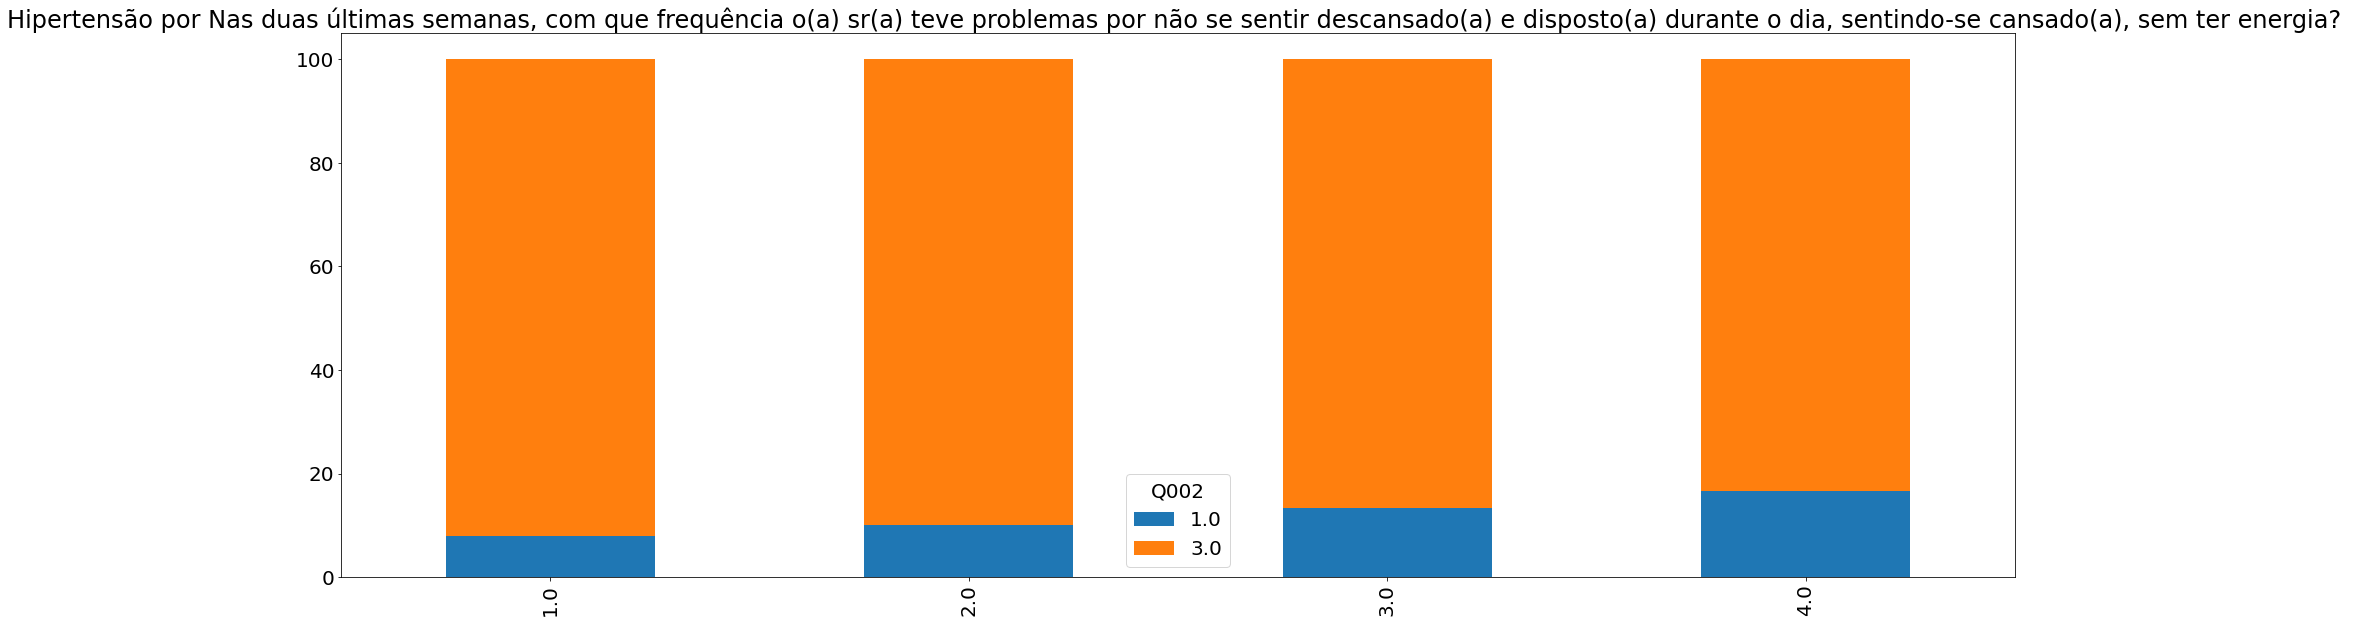

In [46]:
print(database['N011'].value_counts(), database['N011'].unique())
database.groupby(['N011', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por Nas duas últimas semanas, com que frequência o(a) sr(a) teve problemas por não se sentir descansado(a) e disposto(a) durante o dia, sentindo-se cansado(a), sem ter energia? ')
plt.xlabel("")
plt.show()

#1. Nenhum dia
#2. Menos da metade dos dias
#3. Mais da metade dos dias
#4. Quase todos os dias

1.0    1813
2.0     424
4.0     100
3.0      84
Name: N012, dtype: int64 [2. 3. 1. 4.]


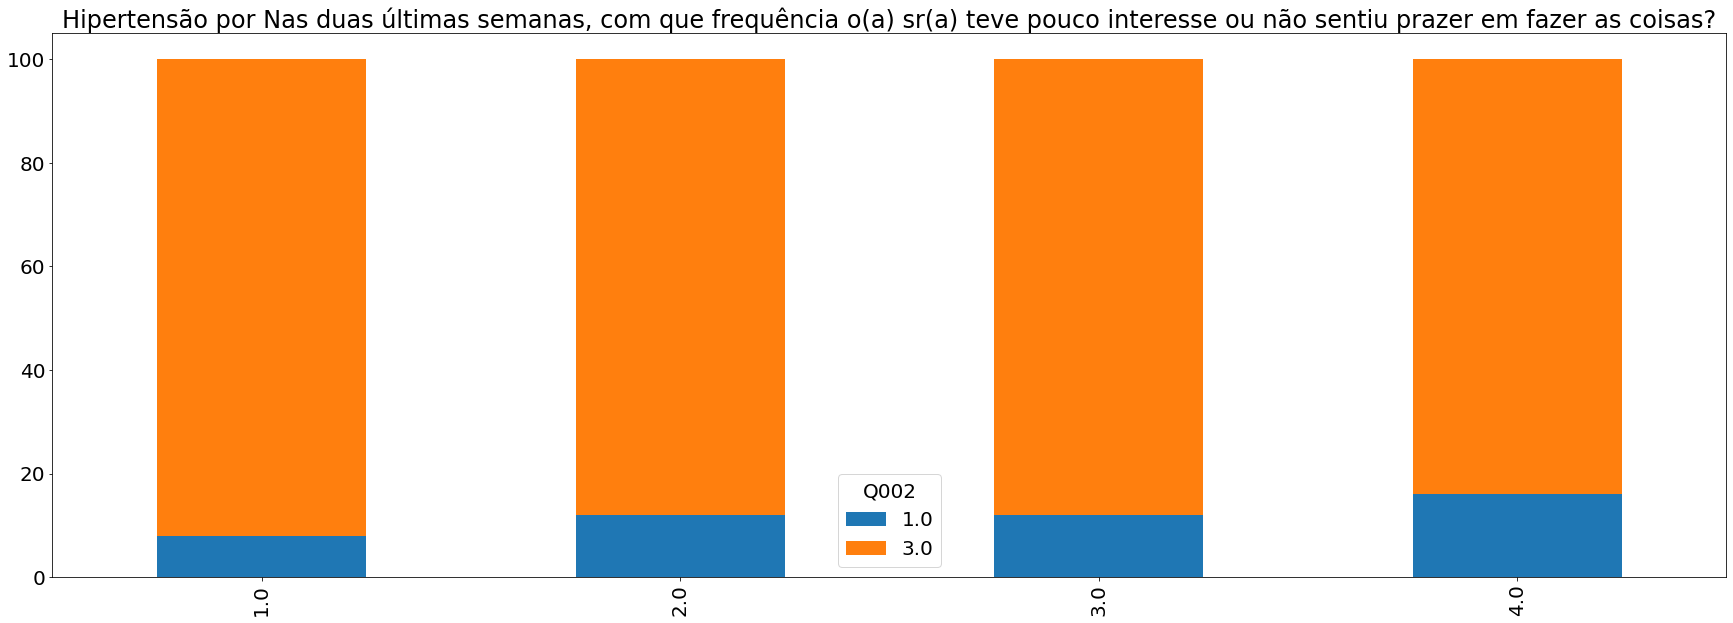

In [47]:
print(database['N012'].value_counts(), database['N012'].unique())
database.groupby(['N012', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por Nas duas últimas semanas, com que frequência o(a) sr(a) teve pouco interesse ou não sentiu prazer em fazer as coisas?')
plt.xlabel("")
plt.show()

#1. Nenhum dia
#2. Menos da metade dos dias
#3. Mais da metade dos dias
#4. Quase todos os dias

1.0    1985
2.0     302
4.0      72
3.0      62
Name: N013, dtype: int64 [2. 1. 3. 4.]


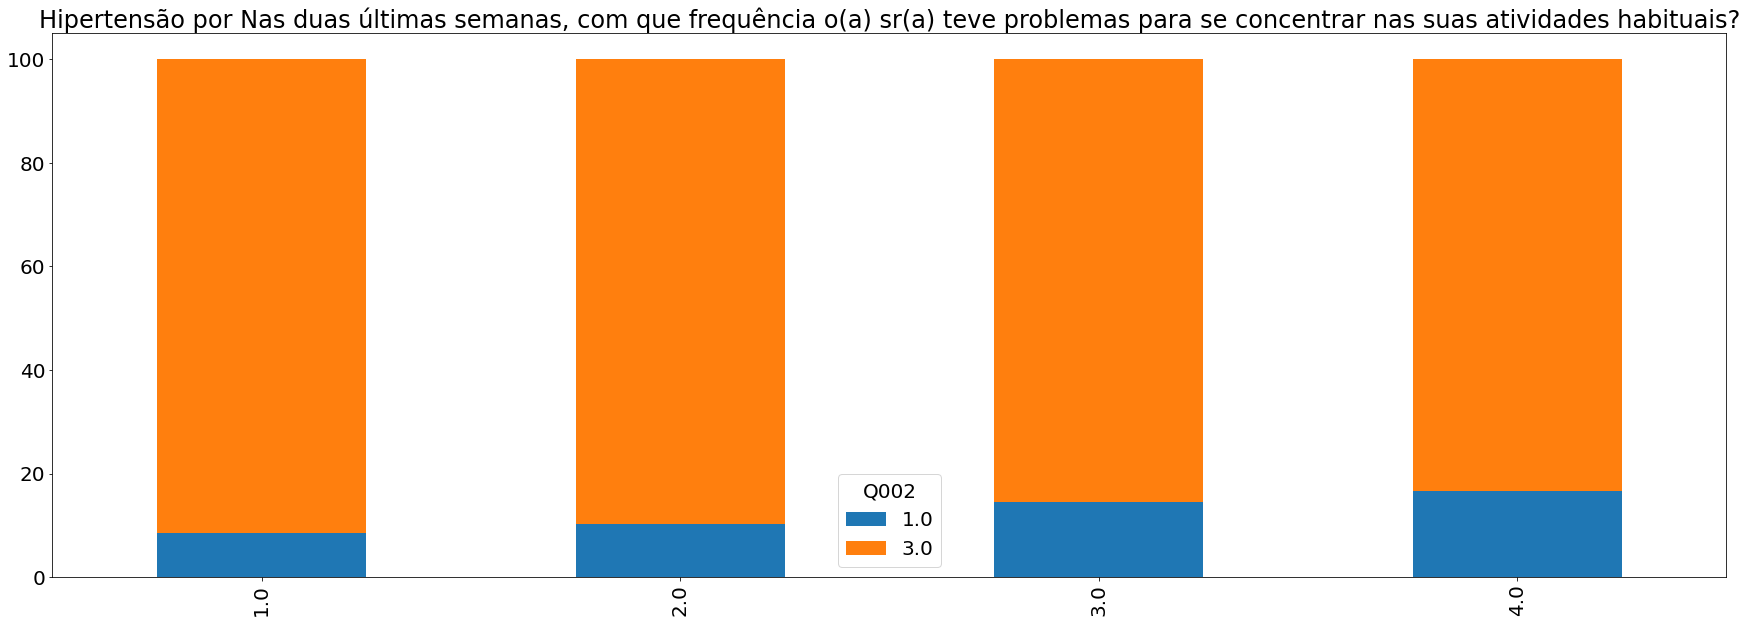

In [48]:
print(database['N013'].value_counts(), database['N013'].unique())
database.groupby(['N013', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por Nas duas últimas semanas, com que frequência o(a) sr(a) teve problemas para se concentrar nas suas atividades habituais?')
plt.xlabel("")
plt.show()

#1. Nenhum dia
#2. Menos da metade dos dias
#3. Mais da metade dos dias
#4. Quase todos os dias

1.0    1940
2.0     269
4.0     110
3.0     102
Name: N014, dtype: int64 [1. 2. 3. 4.]


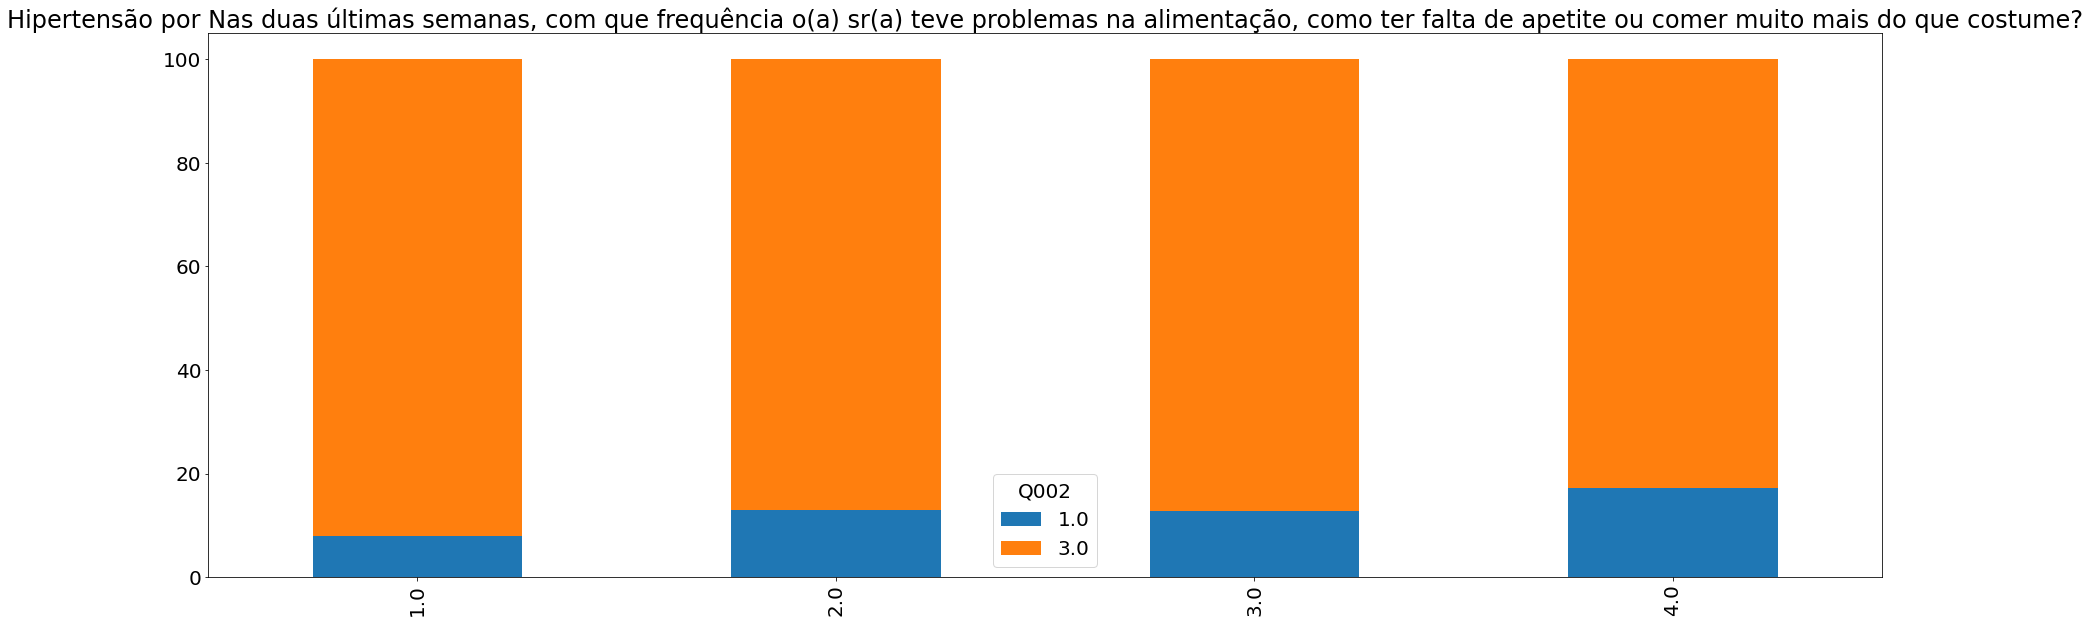

In [49]:
print(database['N014'].value_counts(), database['N014'].unique())
database.groupby(['N014', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por Nas duas últimas semanas, com que frequência o(a) sr(a) teve problemas na alimentação, como ter falta de apetite ou comer muito mais do que costume?')
plt.xlabel("")
plt.show()

#1. Nenhum dia
#2. Menos da metade dos dias
#3. Mais da metade dos dias
#4. Quase todos os dias

1.0    2133
2.0     164
4.0      72
3.0      52
Name: N015, dtype: int64 [1. 4. 2. 3.]


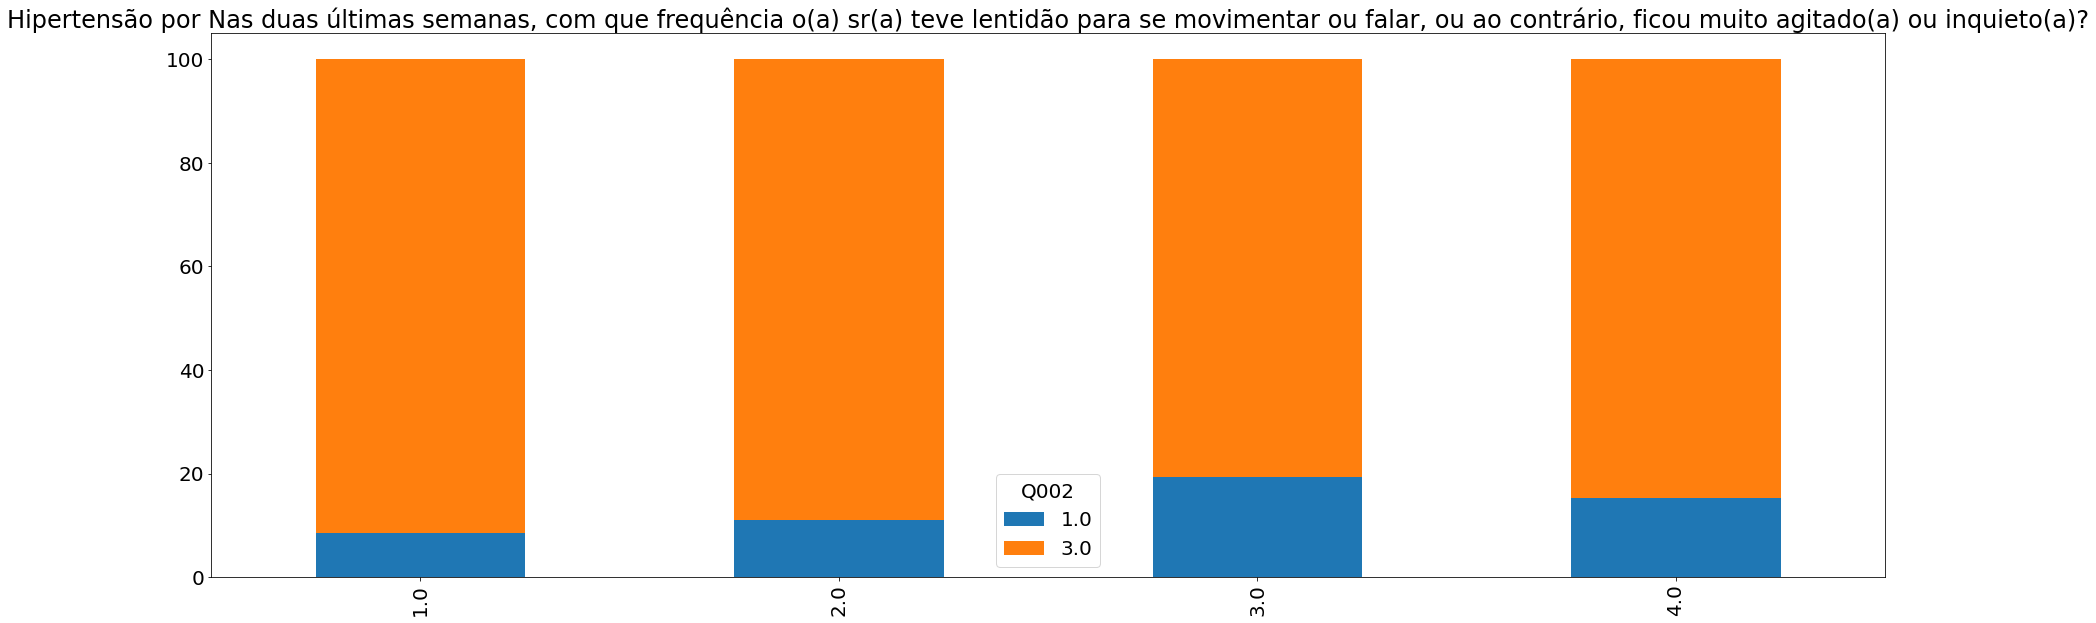

In [50]:
print(database['N015'].value_counts(), database['N015'].unique())
database.groupby(['N015', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por Nas duas últimas semanas, com que frequência o(a) sr(a) teve lentidão para se movimentar ou falar, ou ao contrário, ficou muito agitado(a) ou inquieto(a)?')
plt.xlabel("")
plt.show()

#1. Nenhum dia
#2. Menos da metade dos dias
#3. Mais da metade dos dias
#4. Quase todos os dias

1.0    1941
2.0     333
3.0      79
4.0      68
Name: N016, dtype: int64 [2. 1. 4. 3.]


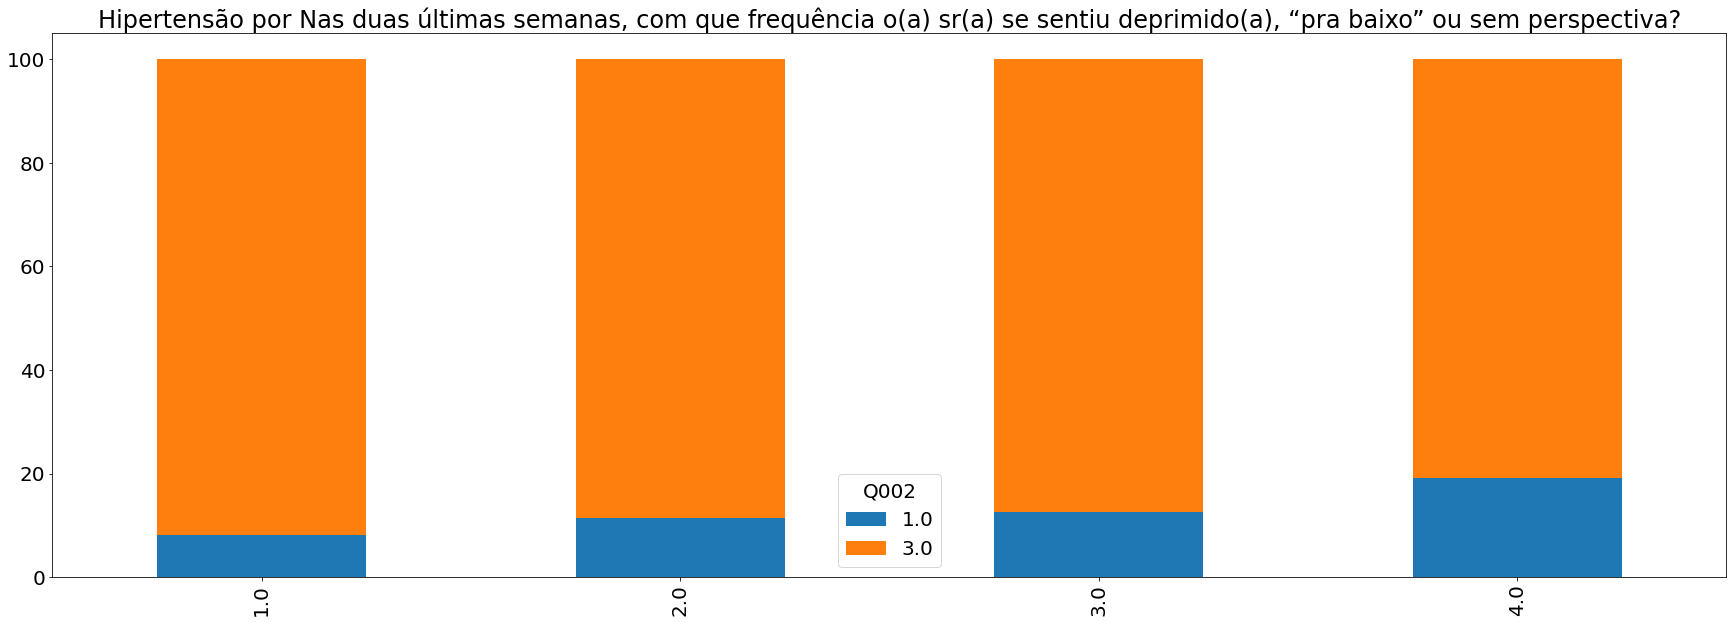

In [51]:
print(database['N016'].value_counts(), database['N016'].unique())
database.groupby(['N016', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por Nas duas últimas semanas, com que frequência o(a) sr(a) se sentiu deprimido(a), “pra baixo” ou sem perspectiva?')
plt.xlabel("")
plt.show()

#1. Nenhum dia
#2. Menos da metade dos dias
#3. Mais da metade dos dias
#4. Quase todos os dias

1.0    2123
2.0     195
4.0      54
3.0      49
Name: N017, dtype: int64 [1. 4. 2. 3.]


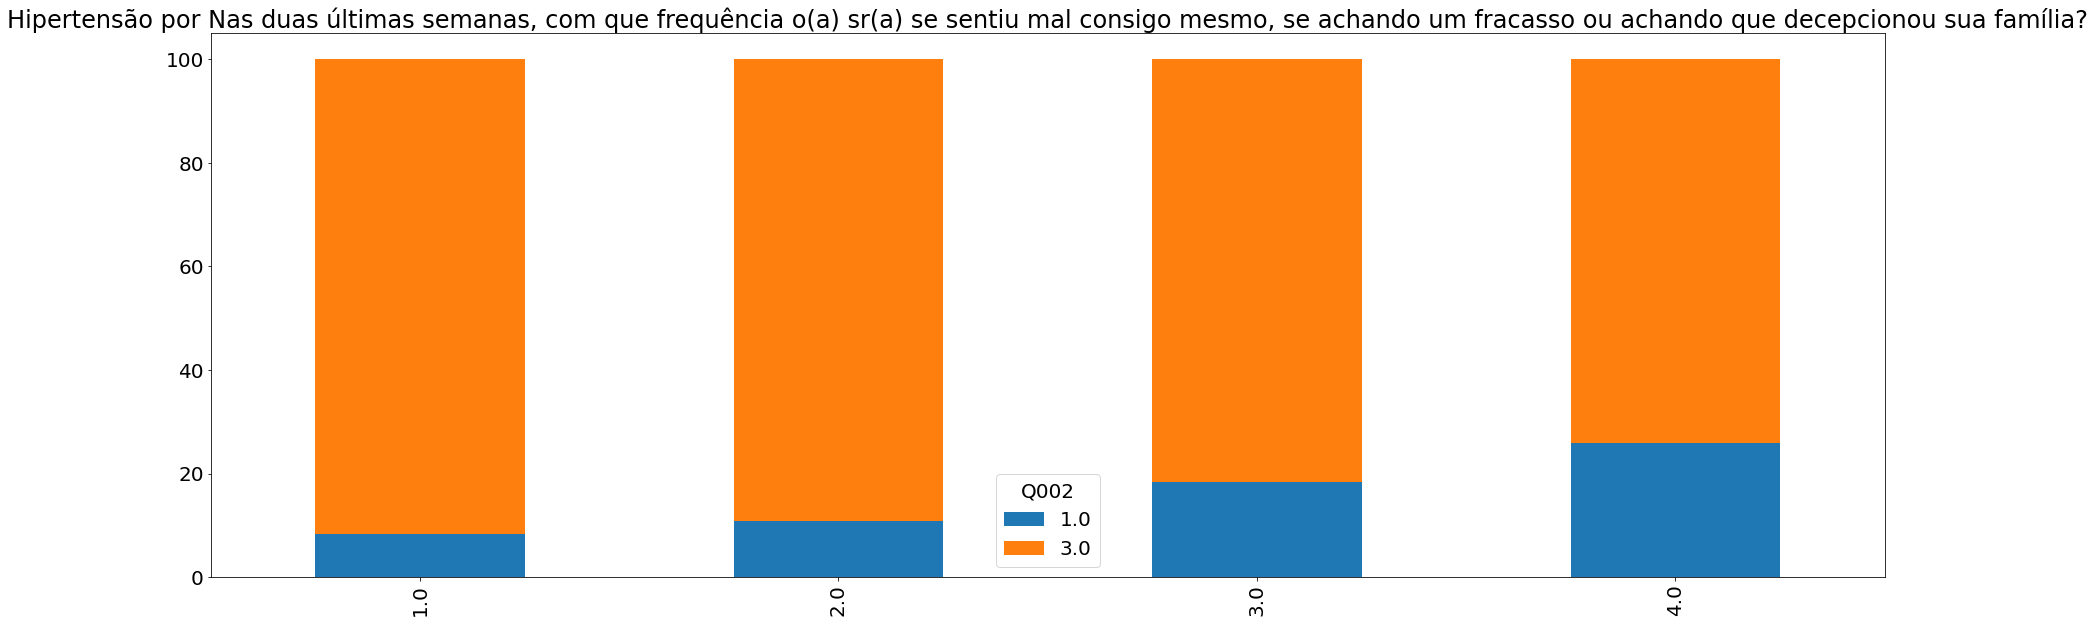

In [52]:
print(database['N017'].value_counts(), database['N017'].unique())
database.groupby(['N017', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por Nas duas últimas semanas, com que frequência o(a) sr(a) se sentiu mal consigo mesmo, se achando um fracasso ou achando que decepcionou sua família?')
plt.xlabel("")
plt.show()

#1. Nenhum dia
#2. Menos da metade dos dias
#3. Mais da metade dos dias
#4. Quase todos os dias

1.0    2322
2.0      63
3.0      24
4.0      12
Name: N018, dtype: int64 [1. 4. 2. 3.]


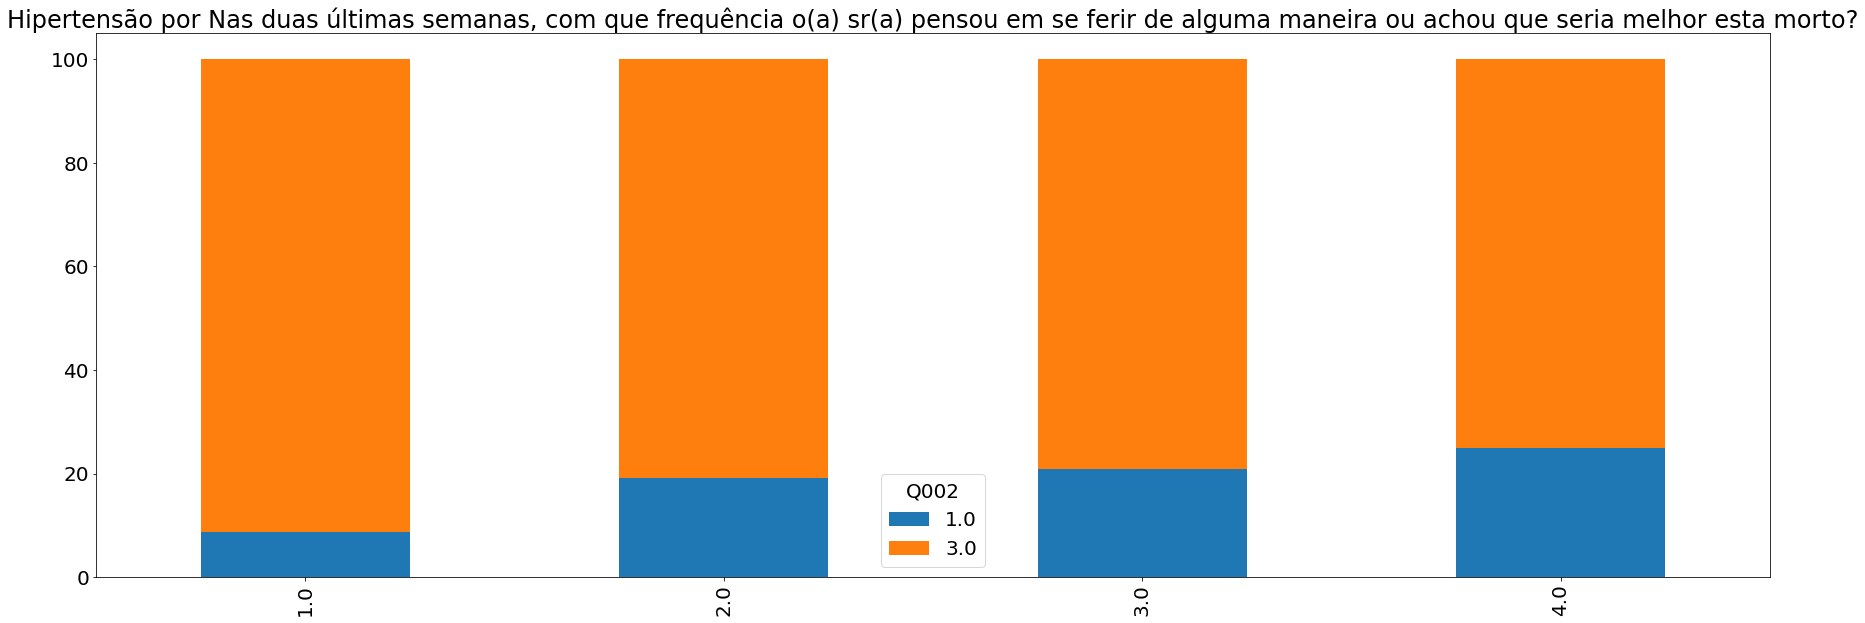

In [53]:
print(database['N018'].value_counts(), database['N018'].unique())
database.groupby(['N018', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por Nas duas últimas semanas, com que frequência o(a) sr(a) pensou em se ferir de alguma maneira ou achou que seria melhor esta morto?')
plt.xlabel("")
plt.show()

#1. Nenhum dia
#2. Menos da metade dos dias
#3. Mais da metade dos dias
#4. Quase todos os dias

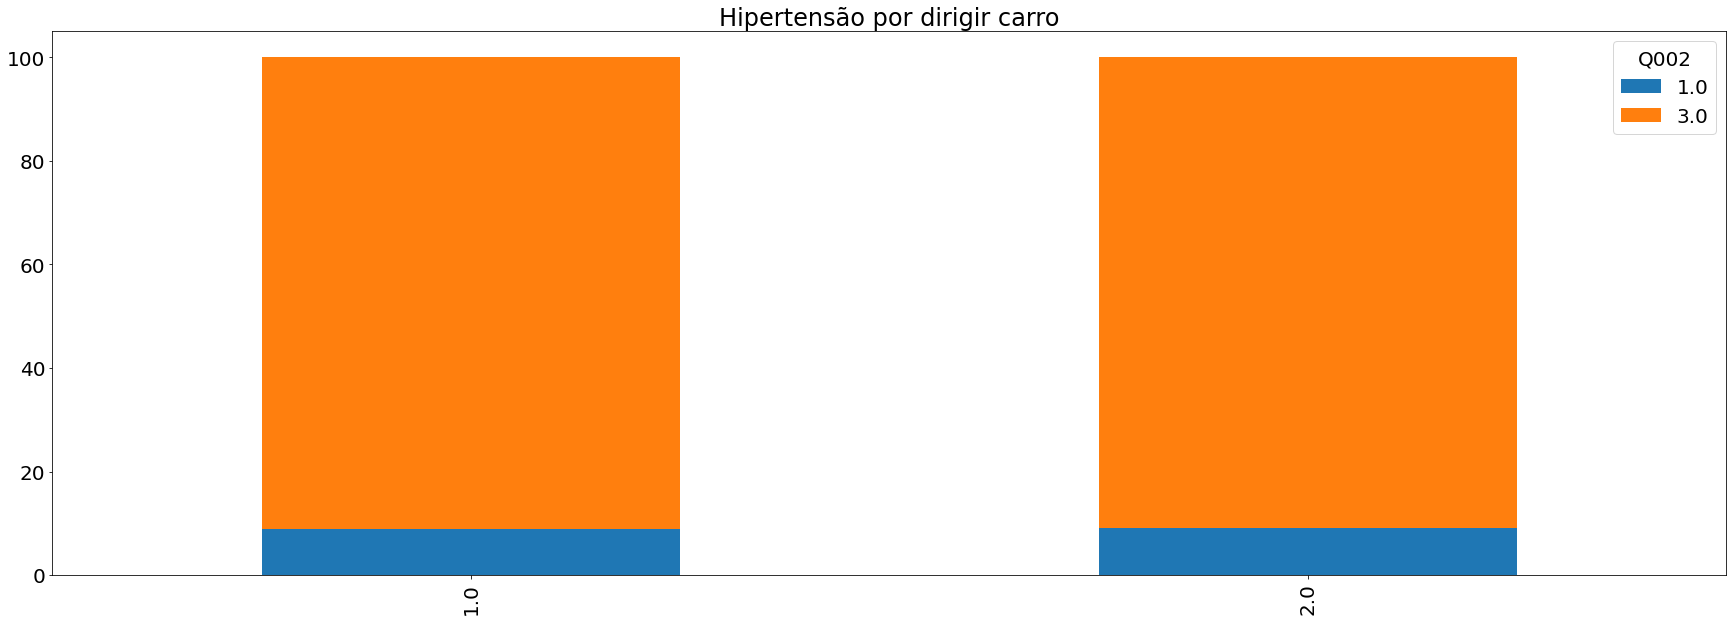

In [54]:
database.groupby(['O001', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por dirigir carro')
plt.xlabel("")
plt.show()

# 1. Sim
# 2. Não

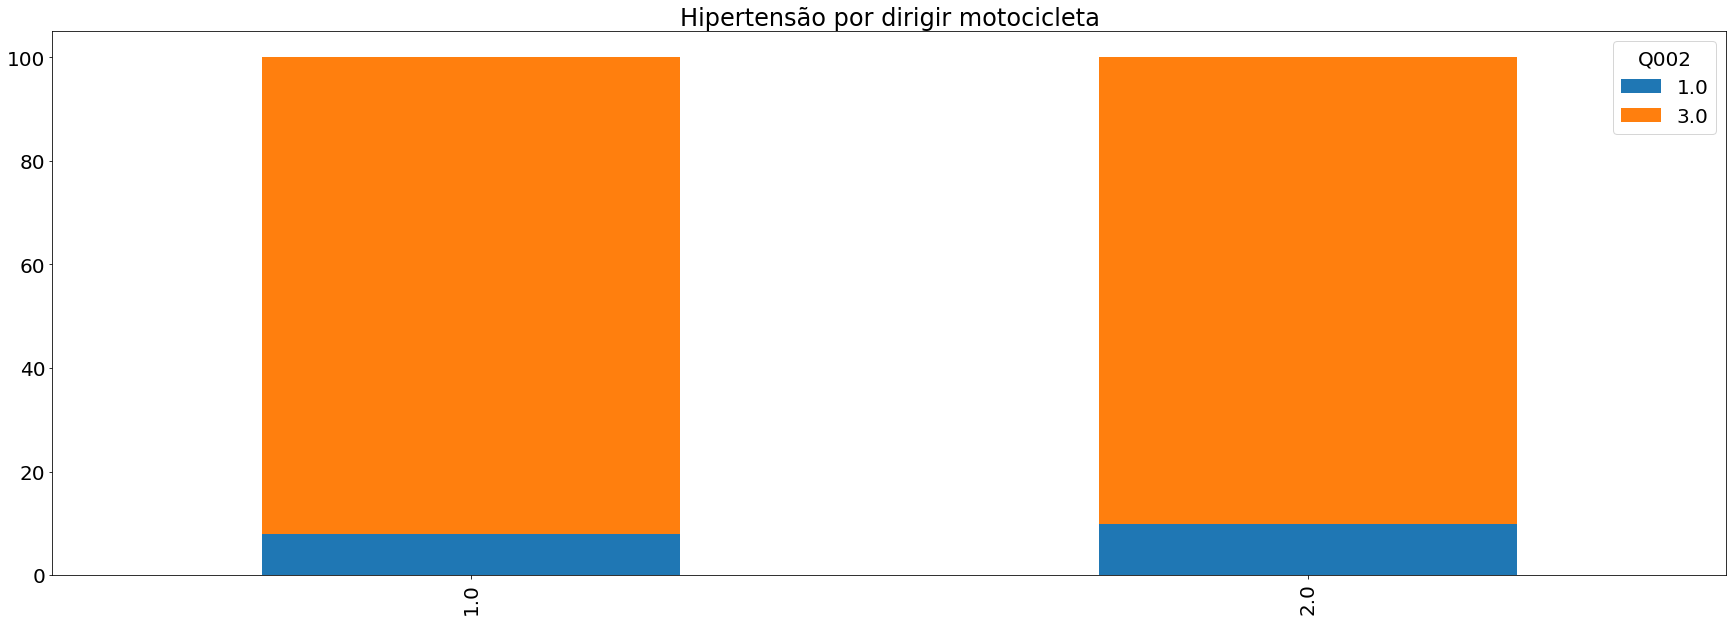

In [55]:
database.groupby(['O002', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por dirigir motocicleta')
plt.xlabel("")
plt.show()

# 1. Sim
# 2. Não

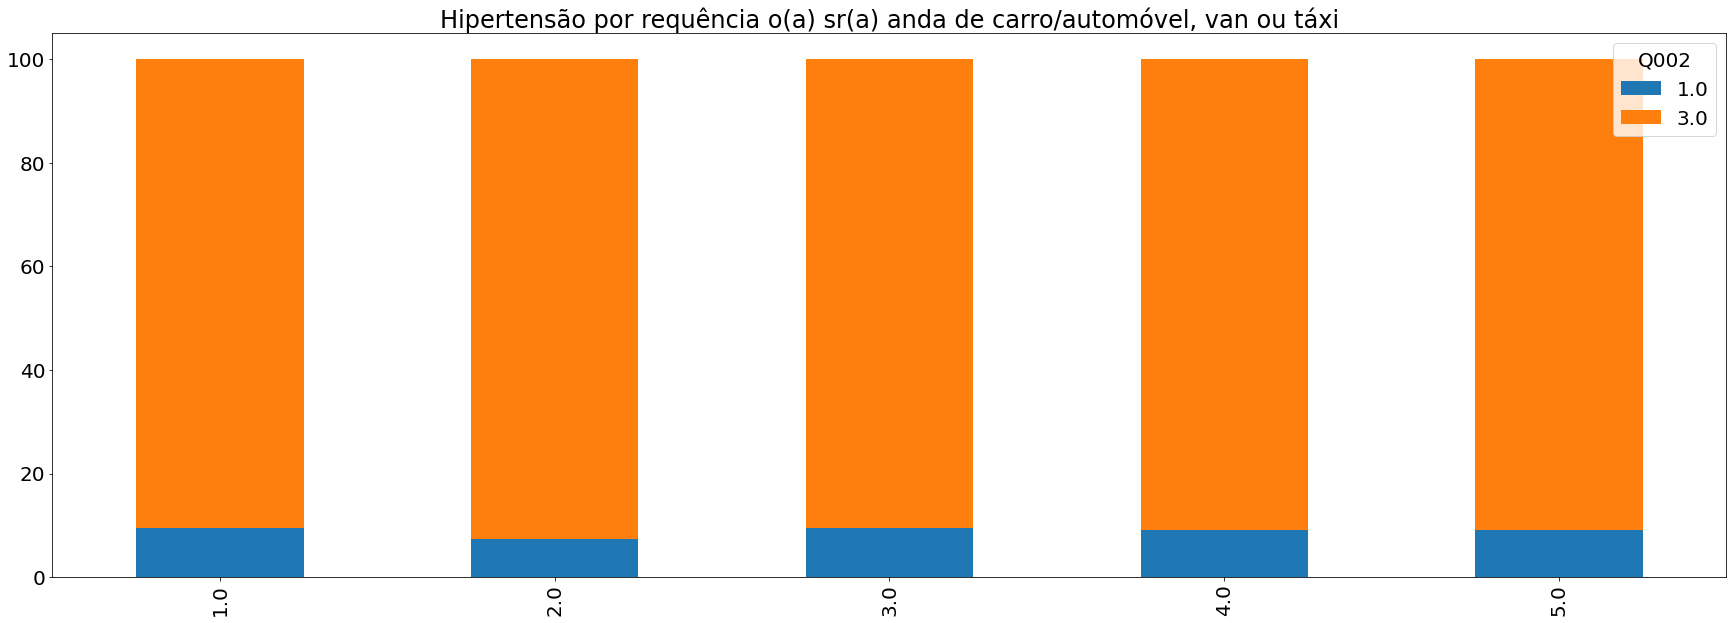

In [56]:
database.groupby(['O003', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por requência o(a) sr(a) anda de carro/automóvel, van ou táxi')
plt.xlabel("")
plt.show()

# 1. Sempre
# 2. Quase sempre
# 3. Às vezes
# 4. Raramente
# 5. Nunca

In [57]:
database = database[database['J011'] != 5]
database

,V0001,C006,C008,C009,C010,D002,E001,E002,E003,E011,...,P05901,P05902,P05903,P05904,P067,P068,Q001,Q002,X001,X002
68,11,2,23,4,1.0,2.0,2.0,2.0,2.0,NaN,...,.,.,.,.,3.0,5.0,1.0,1.0,2.0,4.0
77,11,2,24,4,1.0,2.0,2.0,2.0,2.0,NaN,...,.,.,.,.,3.0,4.0,1.0,1.0,3.0,4.0
146,11,2,19,4,2.0,2.0,2.0,2.0,2.0,NaN,...,.,.,.,.,3.0,5.0,1.0,1.0,2.0,8.0
154,11,1,21,4,1.0,2.0,1.0,NaN,NaN,1.0,...,.,.,.,.,3.0,5.0,3.0,1.0,5.0,NaN
162,11,2,24,4,1.0,2.0,2.0,2.0,2.0,NaN,...,.,.,.,.,3.0,5.0,2.0,1.0,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24979,29,2,25,2,1.0,1.0,2.0,2.0,2.0,NaN,...,.,.,.,.,3.0,5.0,1.0,3.0,3.0,4.0
24986,11,1,20,4,2.0,1.0,1.0,NaN,NaN,1.0,...,.,.,.,.,3.0,5.0,1.0,3.0,2.0,7.0
24992,53,2,22,1,2.0,2.0,1.0,NaN,NaN,1.0,...,.,.,.,.,3.0,5.0,1.0,3.0,5.0,NaN
24994,42,2,25,1,1.0,2.0,1.0,NaN,NaN,1.0,...,.,.,.,.,3.0,5.0,1.0,3.0,3.0,4.0


In [58]:
# Retirada de variáveis que não estão interferindo na base
lista = ["C006", "D002", "E002", "E014", "E017", "I001", "J012", "M006", "M007", "M008", "M009", "M010", "M014", "M015", "N001", "N002", "N003", "N004", "N005", "N006", "N018", "O001", "O002", "O003", "P003"]
database.drop(columns = lista, inplace = True)
database.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2412 entries, 68 to 24997
Data columns (total 127 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0001   2412 non-null   int64  
 1   C008    2412 non-null   int64  
 2   C009    2412 non-null   int64  
 3   C010    2412 non-null   float64
 4   E001    2412 non-null   float64
 5   E003    1123 non-null   float64
 6   E011    1387 non-null   float64
 7   E01602  2412 non-null   object 
 8   E01604  2412 non-null   object 
 9   E01802  2412 non-null   object 
 10  E01804  2412 non-null   object 
 11  E019    2412 non-null   object 
 12  J001    2412 non-null   int64  
 13  J011    2412 non-null   int64  
 14  M01101  1387 non-null   float64
 15  M01102  1387 non-null   float64
 16  M01103  1387 non-null   float64
 17  M01104  1387 non-null   float64
 18  M01105  1387 non-null   float64
 19  M01106  1387 non-null   float64
 20  M01107  1387 non-null   float64
 21  M01108  1387 non-null   float64
 2

3.0    1623
2.0     365
4.0     324
1.0      72
5.0      28
Name: P02601, dtype: int64 [4. 3. 2. 1. 5.]


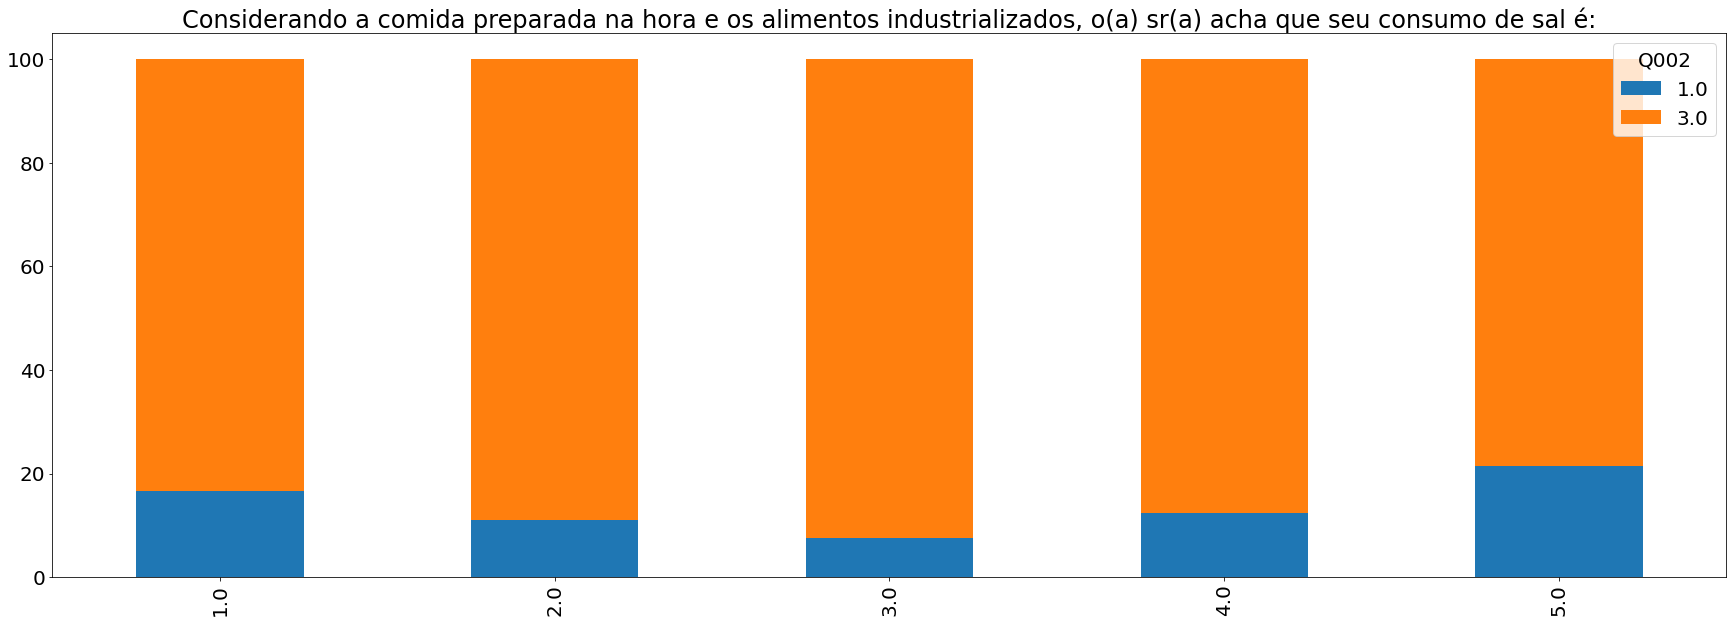

In [59]:
#database['P015'].fillna(value=0, inplace=True)
print(database['P02601'].value_counts(), database['P02601'].unique())
database.groupby(['P02601', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Considerando a comida preparada na hora e os alimentos industrializados, o(a) sr(a) acha que seu consumo de sal é:')
plt.xlabel("")
plt.show()

# 1. Muito alto
# 2. Alto
# 3. Adequado
# 4. Baixo
# 5. Muito baixo

2.0    543
3.0    518
1.0    391
4.0    324
5.0    212
7.0    180
6.0    127
8.0    117
Name: P045, dtype: int64 [5. 2. 7. 4. 1. 3. 8. 6.]


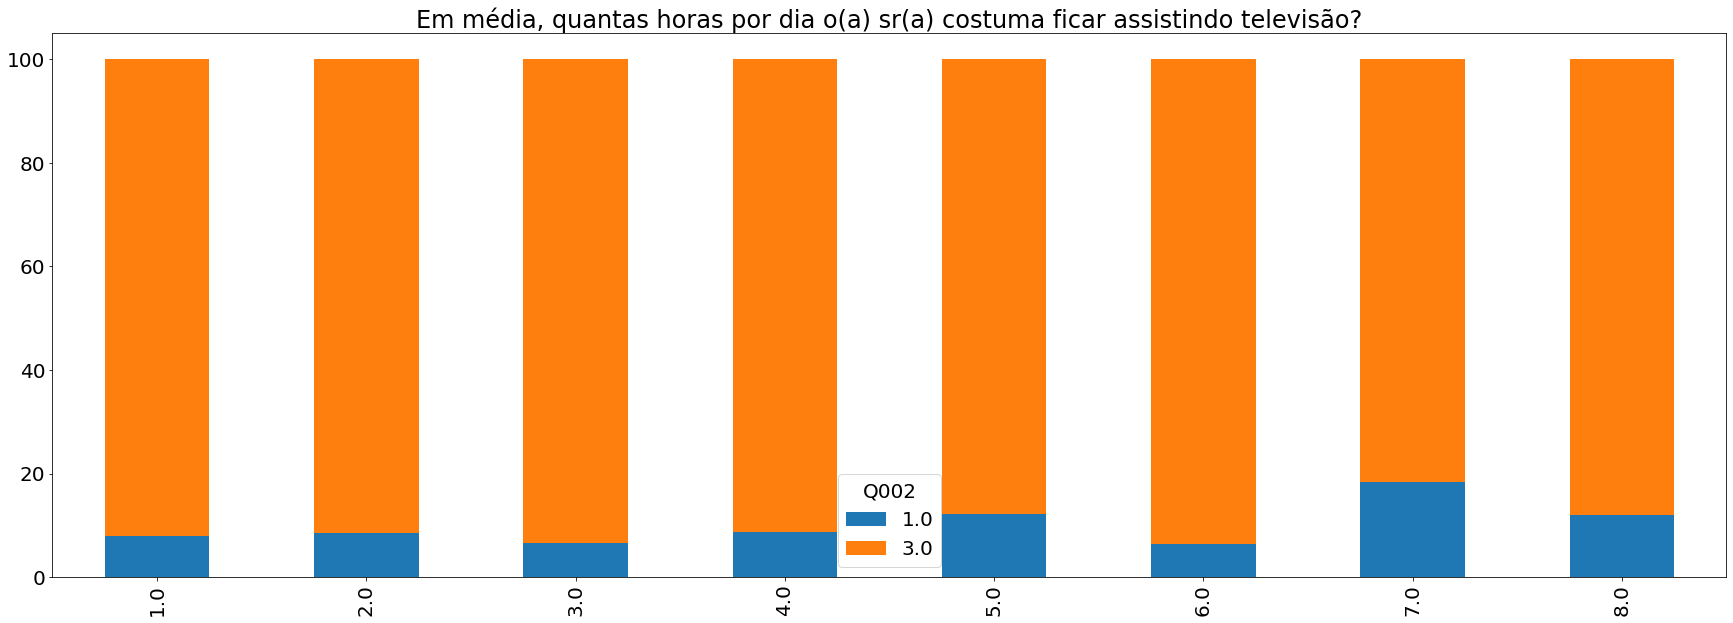

In [60]:
#database['P035'][database['P035'] == '.'] = '0'
print(database['P045'].value_counts(), database['P045'].unique())
database.groupby(['P045', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Em média, quantas horas por dia o(a) sr(a) costuma ficar assistindo televisão?')
plt.xlabel("")
plt.show()

#1. Menos de 1 hora
#2. Entre 1 hora e menos de 2 horas
#3. Entre 2 horas e menos de 3 horas
#4. Entre 3 horas e menos de 4 horas
#5. Entre 4 horas e menos de 5 horas
#6. Entre 5 horas e menos de 6 horas
#7. 6 horas ou mais
#8. Não assiste televisão

5.0    666
4.0    664
3.0    432
1.0    425
2.0    225
Name: X001, dtype: int64 [2. 3. 5. 4. 1.]


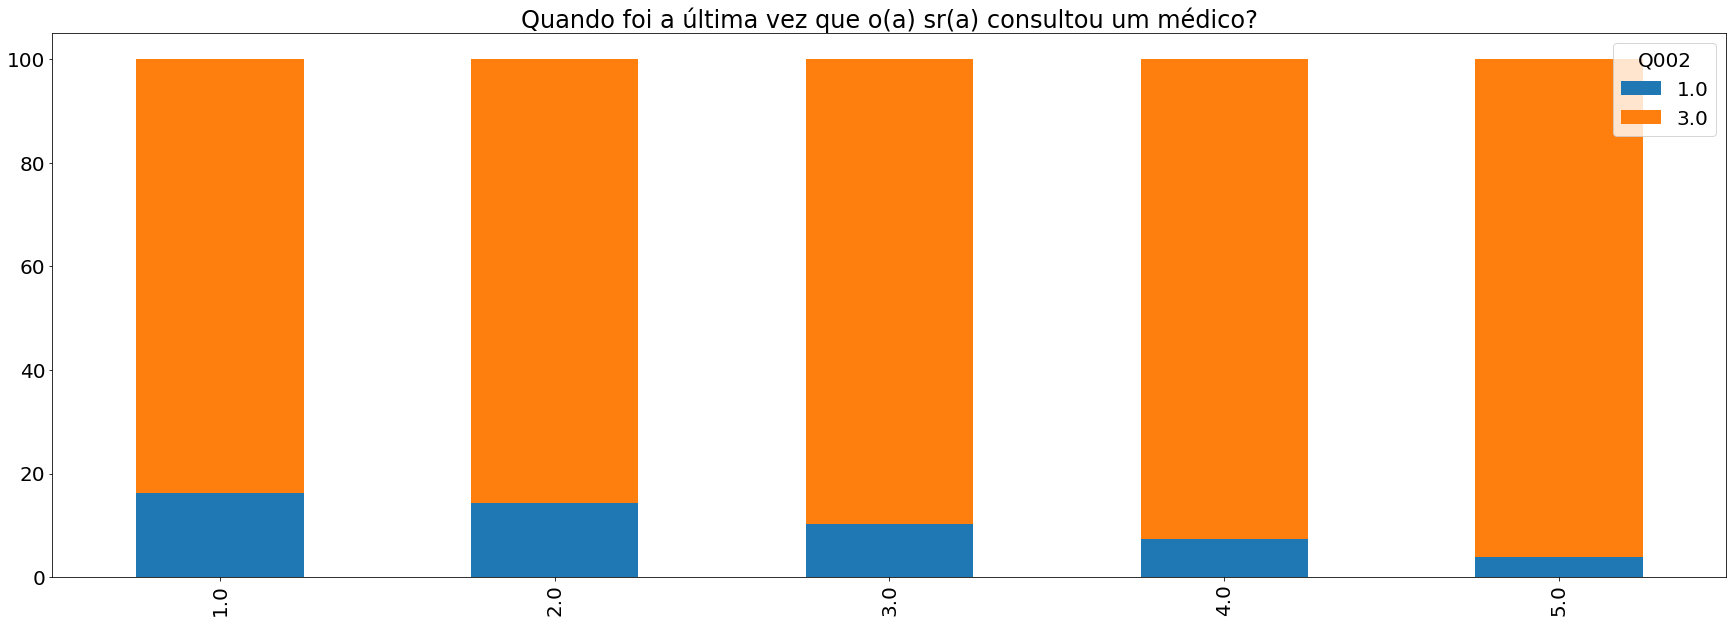

In [61]:
#database['P035'][database['P035'] == '.'] = '0'
print(database['X001'].value_counts(), database['X001'].unique())
database.groupby(['X001', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Quando foi a última vez que o(a) sr(a) consultou um médico?')
plt.xlabel("")
plt.show()

# 1. Há menos de 2 semanas
# 2. Entre 15 dias e um mês
# 3. Entre um mês e 3 meses atrás
# 4. Entre 3 meses e um ano
# 5. Há mais de um ano

4.0    609
7.0    510
8.0    191
2.0    146
3.0    119
1.0     88
5.0     73
6.0     10
Name: X002, dtype: int64 [ 4.  8. nan  7.  3.  2.  1.  5.  6.]


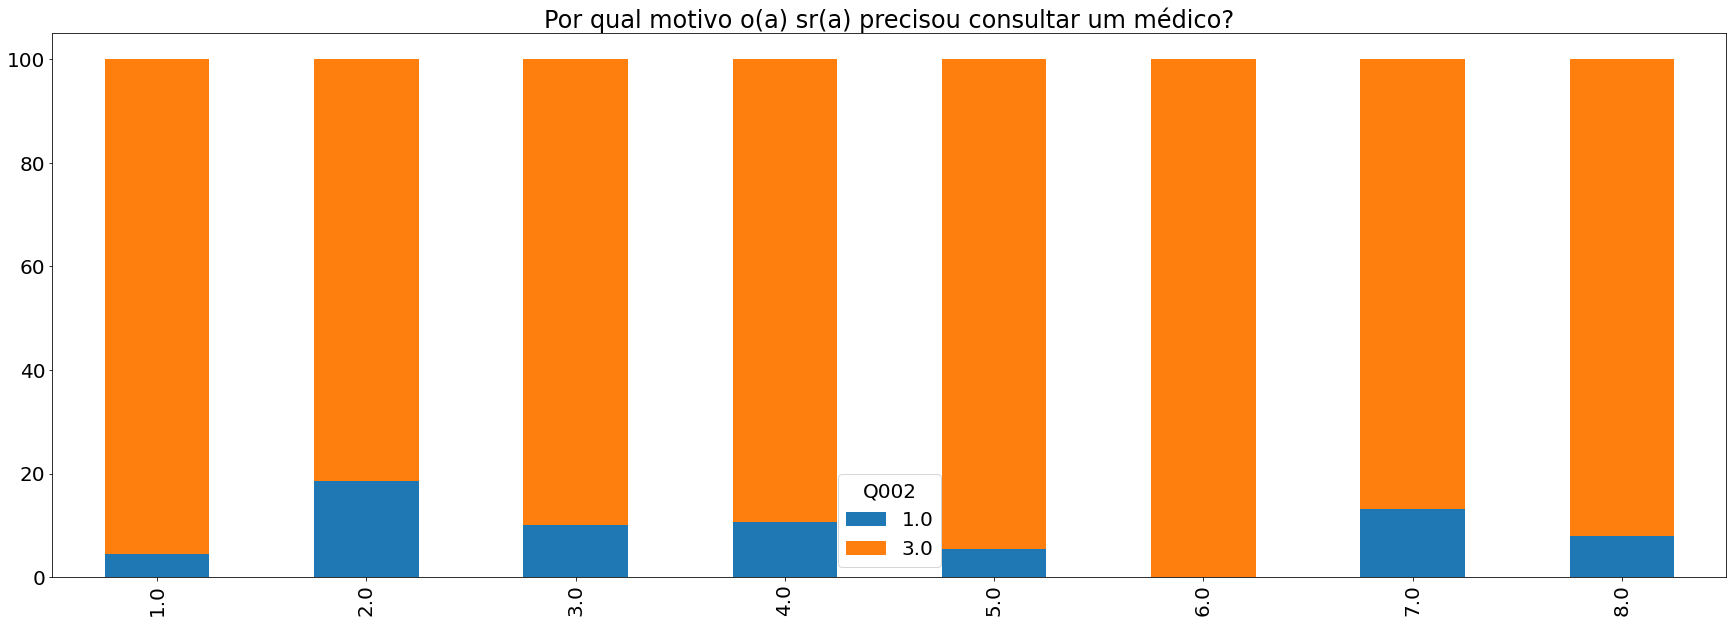

In [62]:
#database['P035'][database['P035'] == '.'] = '0'
print(database['X002'].value_counts(), database['X002'].unique())
database.groupby(['X002', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Por qual motivo o(a) sr(a) precisou consultar um médico?')
plt.xlabel("")
plt.show()

In [63]:
# Retirada de variáveis que não estão interferindo na base
lista = ["P001", "P00101", "P002", "P005", "P008", "P010", "P012", "P014", "P017", "P019", "P022", "P024", "P027", "P028", "P029", "P031", "P033", "P035", "P03701", "P03702", "P038", "P03901", "P03902", "P03903", "P040", "P04101", "P04102", "P04301", "P04302", "P04401", "P04403", "P04404", "P051", "P053", "P05401", "P05402", "P05403", "P05404", "P05405", "P05406", "P05407", "P05408", "P05409", "P05410", "P05411", "P05412", "P05413", "P05414", "P05415", "P05416", "P05417", "P05418", "P05419", "P05421", "P05422", "P055", "P056", "P058", "P067", "Q001", "X002"]
database.drop(columns = lista, inplace = True)
database.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2412 entries, 68 to 24997
Data columns (total 66 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0001   2412 non-null   int64  
 1   C008    2412 non-null   int64  
 2   C009    2412 non-null   int64  
 3   C010    2412 non-null   float64
 4   E001    2412 non-null   float64
 5   E003    1123 non-null   float64
 6   E011    1387 non-null   float64
 7   E01602  2412 non-null   object 
 8   E01604  2412 non-null   object 
 9   E01802  2412 non-null   object 
 10  E01804  2412 non-null   object 
 11  E019    2412 non-null   object 
 12  J001    2412 non-null   int64  
 13  J011    2412 non-null   int64  
 14  M01101  1387 non-null   float64
 15  M01102  1387 non-null   float64
 16  M01103  1387 non-null   float64
 17  M01104  1387 non-null   float64
 18  M01105  1387 non-null   float64
 19  M01106  1387 non-null   float64
 20  M01107  1387 non-null   float64
 21  M01108  1387 non-null   float64
 22

In [64]:
# Retirada de variáveis que não estão interferindo na base
lista = ["M01101", "M01102", "M01103", "M01104", "M01105", "M01106", "M01107", "M01108"]
database.drop(columns = lista, inplace = True)
database.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2412 entries, 68 to 24997
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0001   2412 non-null   int64  
 1   C008    2412 non-null   int64  
 2   C009    2412 non-null   int64  
 3   C010    2412 non-null   float64
 4   E001    2412 non-null   float64
 5   E003    1123 non-null   float64
 6   E011    1387 non-null   float64
 7   E01602  2412 non-null   object 
 8   E01604  2412 non-null   object 
 9   E01802  2412 non-null   object 
 10  E01804  2412 non-null   object 
 11  E019    2412 non-null   object 
 12  J001    2412 non-null   int64  
 13  J011    2412 non-null   int64  
 14  M016    2412 non-null   float64
 15  N010    2412 non-null   float64
 16  N011    2412 non-null   float64
 17  N012    2412 non-null   float64
 18  N013    2412 non-null   float64
 19  N014    2412 non-null   float64
 20  N015    2412 non-null   float64
 21  N016    2412 non-null   float64
 22

In [65]:
# Retirada de variáveis que não estão interferindo na base
lista = ["P05601", "P05602", "P05603", "P05604", "P05605", "P05801", "P05802", "P05901", "P05902", "P05903", "P05904"]
database.drop(columns = lista, inplace = True)
database.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2412 entries, 68 to 24997
Data columns (total 47 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0001   2412 non-null   int64  
 1   C008    2412 non-null   int64  
 2   C009    2412 non-null   int64  
 3   C010    2412 non-null   float64
 4   E001    2412 non-null   float64
 5   E003    1123 non-null   float64
 6   E011    1387 non-null   float64
 7   E01602  2412 non-null   object 
 8   E01604  2412 non-null   object 
 9   E01802  2412 non-null   object 
 10  E01804  2412 non-null   object 
 11  E019    2412 non-null   object 
 12  J001    2412 non-null   int64  
 13  J011    2412 non-null   int64  
 14  M016    2412 non-null   float64
 15  N010    2412 non-null   float64
 16  N011    2412 non-null   float64
 17  N012    2412 non-null   float64
 18  N013    2412 non-null   float64
 19  N014    2412 non-null   float64
 20  N015    2412 non-null   float64
 21  N016    2412 non-null   float64
 22

In [66]:
# Retirada de variáveis que não estão interferindo na base
lista = ["P00301", "E01602", "E01604", "E01802", "E01804" ]
database.drop(columns = lista, inplace = True)
database.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2412 entries, 68 to 24997
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0001   2412 non-null   int64  
 1   C008    2412 non-null   int64  
 2   C009    2412 non-null   int64  
 3   C010    2412 non-null   float64
 4   E001    2412 non-null   float64
 5   E003    1123 non-null   float64
 6   E011    1387 non-null   float64
 7   E019    2412 non-null   object 
 8   J001    2412 non-null   int64  
 9   J011    2412 non-null   int64  
 10  M016    2412 non-null   float64
 11  N010    2412 non-null   float64
 12  N011    2412 non-null   float64
 13  N012    2412 non-null   float64
 14  N013    2412 non-null   float64
 15  N014    2412 non-null   float64
 16  N015    2412 non-null   float64
 17  N016    2412 non-null   float64
 18  N017    2412 non-null   float64
 19  P006    2412 non-null   int64  
 20  P007    2412 non-null   int64  
 21  P009    2412 non-null   int64  
 22

In [69]:
# Retirada de variáveis que não estão interferindo na base
lista = ["E019"]
database.drop(columns = lista, inplace = True)
database.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2412 entries, 68 to 24997
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0001   2412 non-null   int64  
 1   C008    2412 non-null   int64  
 2   C009    2412 non-null   int64  
 3   C010    2412 non-null   float64
 4   E001    2412 non-null   float64
 5   E003    1123 non-null   float64
 6   J001    2412 non-null   int64  
 7   J011    2412 non-null   int64  
 8   M016    2412 non-null   float64
 9   N010    2412 non-null   float64
 10  N011    2412 non-null   float64
 11  N012    2412 non-null   float64
 12  N013    2412 non-null   float64
 13  N014    2412 non-null   float64
 14  N015    2412 non-null   float64
 15  N016    2412 non-null   float64
 16  N017    2412 non-null   float64
 17  P006    2412 non-null   int64  
 18  P007    2412 non-null   int64  
 19  P009    2412 non-null   int64  
 20  P011    2412 non-null   int64  
 21  P013    2412 non-null   int64  
 22

2    1561
3     429
1     375
4      39
5       8
Name: J001, dtype: int64 [3 2 4 1 5]


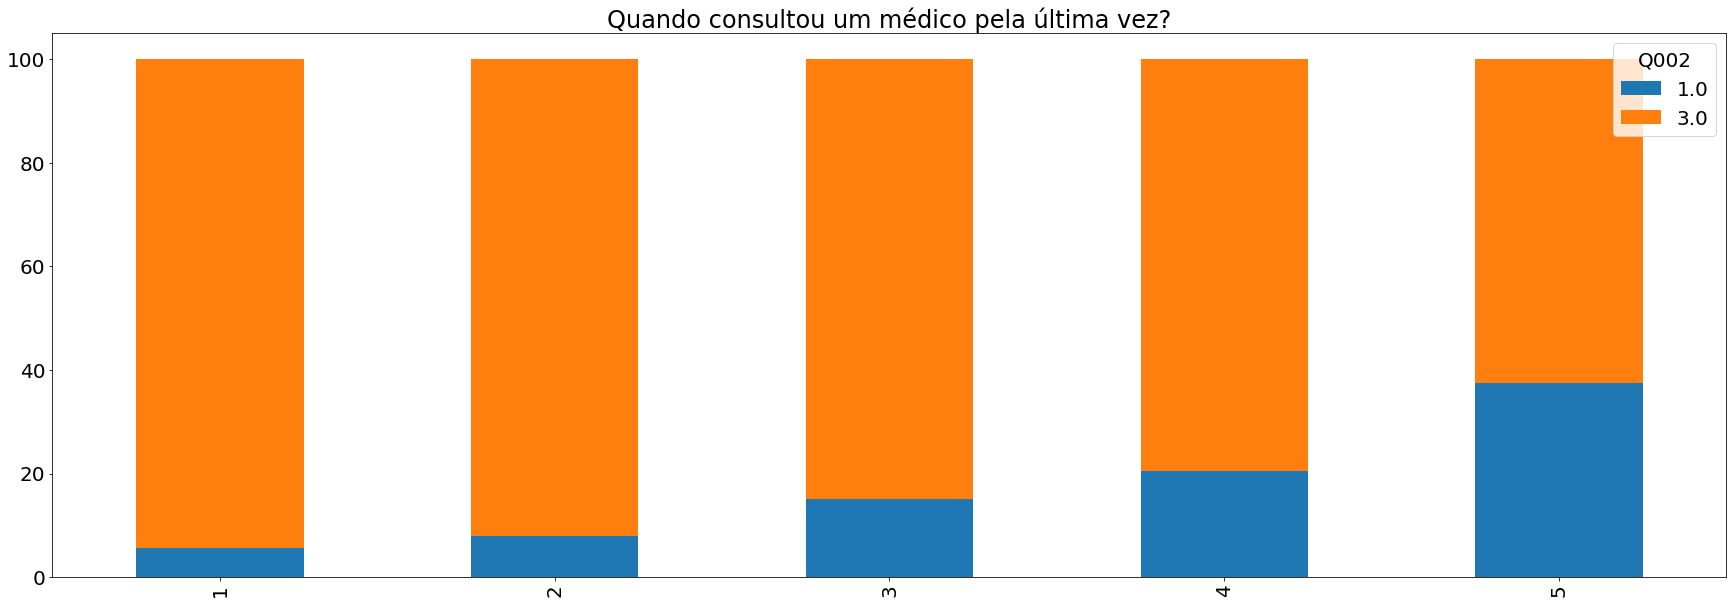

In [71]:
print(database['J001'].value_counts(), database['J001'].unique())
database.groupby(['J001', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Quando consultou um médico pela última vez?')
plt.xlabel("")
plt.show()

In [73]:
# Retirada de variáveis que não estão interferindo na base
lista = ["P039"]
database.drop(columns = lista, inplace = True)
database.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2412 entries, 68 to 24997
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0001   2412 non-null   int64  
 1   C008    2412 non-null   int64  
 2   C009    2412 non-null   int64  
 3   C010    2412 non-null   float64
 4   E001    2412 non-null   float64
 5   E003    1123 non-null   float64
 6   J001    2412 non-null   int64  
 7   M016    2412 non-null   float64
 8   N010    2412 non-null   float64
 9   N011    2412 non-null   float64
 10  N012    2412 non-null   float64
 11  N013    2412 non-null   float64
 12  N014    2412 non-null   float64
 13  N015    2412 non-null   float64
 14  N016    2412 non-null   float64
 15  N017    2412 non-null   float64
 16  P006    2412 non-null   int64  
 17  P007    2412 non-null   int64  
 18  P009    2412 non-null   int64  
 19  P011    2412 non-null   int64  
 20  P013    2412 non-null   int64  
 21  P015    2412 non-null   int64  
 22

2.0    2358
1.0      54
Name: E003, dtype: int64 [2. 1.]


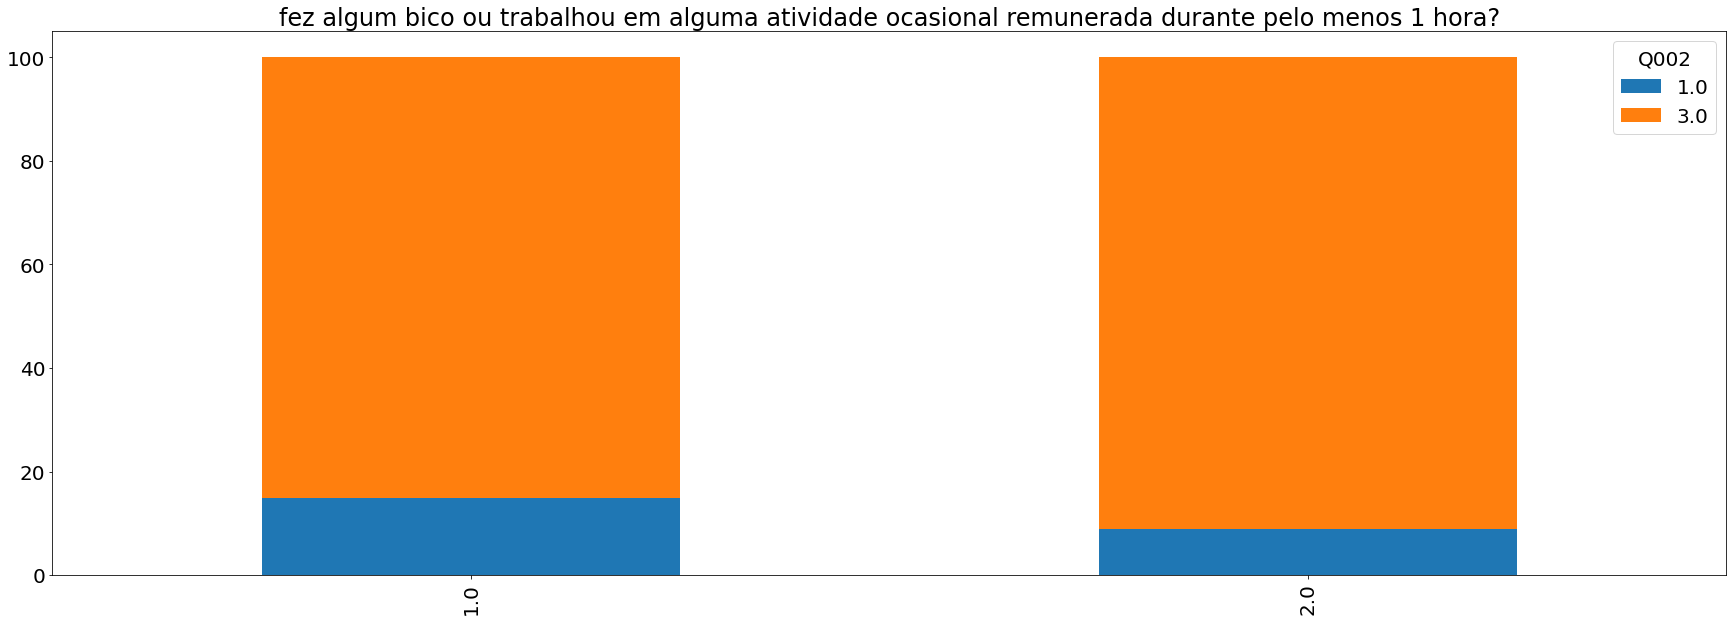

In [75]:
database['E003'].fillna(value=2, inplav)
print(database['E003'].value_counts(), database['E003'].unique())
database.groupby(['E003', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('fez algum bico ou trabalhou em alguma atividade ocasional remunerada durante pelo menos 1 hora?')
plt.xlabel("")
plt.show()

In [78]:
# Retirada de variáveis que não estão interferindo na base
lista = ["P032"]
database.drop(columns = lista, inplace = True)
database.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2412 entries, 68 to 24997
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0001   2412 non-null   int64  
 1   C008    2412 non-null   int64  
 2   C009    2412 non-null   int64  
 3   C010    2412 non-null   float64
 4   E001    2412 non-null   float64
 5   E003    2412 non-null   float64
 6   J001    2412 non-null   int64  
 7   M016    2412 non-null   float64
 8   N010    2412 non-null   float64
 9   N011    2412 non-null   float64
 10  N012    2412 non-null   float64
 11  N013    2412 non-null   float64
 12  N014    2412 non-null   float64
 13  N015    2412 non-null   float64
 14  N016    2412 non-null   float64
 15  N017    2412 non-null   float64
 16  P006    2412 non-null   int64  
 17  P007    2412 non-null   int64  
 18  P009    2412 non-null   int64  
 19  P011    2412 non-null   int64  
 20  P013    2412 non-null   int64  
 21  P015    2412 non-null   int64  
 22

In [86]:
database.to_csv("hipertensao_18a25.csv",sep=';', index=False)

In [111]:
df = pd.read_csv("hipertensao_18a25.csv", sep = ';')
df.head()

,V0001,C008,C009,C010,E001,E003,J001,M016,N010,N011,...,P026,P02601,P034,P042,P044,P045,P050,P068,Q002,X001
0,11,23,4,1.0,2.0,2.0,3,6.0,1.0,2.0,...,2,4.0,2.0,0,2.0,5.0,3.0,5.0,1.0,2.0
1,11,24,4,1.0,2.0,2.0,3,6.0,1.0,1.0,...,7,4.0,2.0,5,2.0,5.0,3.0,4.0,1.0,3.0
2,11,19,4,2.0,2.0,2.0,3,6.0,1.0,1.0,...,0,4.0,2.0,7,2.0,5.0,3.0,5.0,1.0,2.0
3,11,21,4,1.0,1.0,2.0,2,6.0,1.0,1.0,...,2,3.0,2.0,0,2.0,2.0,3.0,5.0,1.0,5.0
4,11,24,4,1.0,2.0,2.0,3,6.0,1.0,1.0,...,0,3.0,2.0,3,2.0,5.0,3.0,5.0,1.0,5.0


In [112]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2412 entries, 0 to 2411
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0001   2412 non-null   int64  
 1   C008    2412 non-null   int64  
 2   C009    2412 non-null   int64  
 3   C010    2412 non-null   float64
 4   E001    2412 non-null   float64
 5   E003    2412 non-null   float64
 6   J001    2412 non-null   int64  
 7   M016    2412 non-null   float64
 8   N010    2412 non-null   float64
 9   N011    2412 non-null   float64
 10  N012    2412 non-null   float64
 11  N013    2412 non-null   float64
 12  N014    2412 non-null   float64
 13  N015    2412 non-null   float64
 14  N016    2412 non-null   float64
 15  N017    2412 non-null   float64
 16  P006    2412 non-null   int64  
 17  P007    2412 non-null   int64  
 18  P009    2412 non-null   int64  
 19  P011    2412 non-null   int64  
 20  P013    2412 non-null   int64  
 21  P015    2412 non-null   int64  
 22  

# Executando algoritmo MLP para resultados preliminares

In [113]:
# Saída
hipertensos = df['Q002']
print(hipertensos.shape)
# holdout 80-20 para agilizar o resultado preliminar
out_treino = hipertensos.iloc[0:1930]
out_teste = hipertensos.iloc[1930:]

(2412,)


In [114]:
df.drop(columns=['Q002'], inplace=True)

In [115]:
treino = df[0:1930]
teste = df[1930:]
X = treino.to_numpy()
X = X.astype(np.float64)

In [116]:
from sklearn.neural_network import MLPClassifier
#X = database.to_numpy()
#X = X.tolist()
#X = X.astype(np.float64)
Y = out_treino.to_numpy()
Y.astype(np.float64)
# usando a para o número de neurônios na hidden layer
# a = (num_entrada + num_saida) / 2
# a = (36 + 1) / 2 = 37 / 2 = 18
clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(1), random_state=1)
clf.fit(X, Y)
X.astype(np.float64)

C:\Users\madof\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([[11., 23.,  4., ...,  3.,  5.,  2.],
       [11., 24.,  4., ...,  3.,  4.,  3.],
       [11., 19.,  4., ...,  3.,  5.,  2.],
       ...,
       [24., 21.,  4., ...,  3.,  5.,  5.],
       [24., 24.,  4., ...,  3.,  5.,  4.],
       [32., 20.,  4., ...,  3.,  5.,  3.]])

In [117]:
#predicao = df.iloc[6267].to_numpy()
#predicao[predicao == '.'] = 0.0
#predicao = predicao.astype(np.float64)

X_teste = teste.to_numpy()
X_teste = X_teste.astype(np.float64)

Y_teste = out_teste.to_numpy()
Y_teste.astype(np.float64)

#esperado = Y[6267]
#print(predicao)
#print(esperado)
resultado = clf.predict(X_teste)

In [118]:
comparacao = resultado - Y_teste

In [119]:
sum = 0
for item in comparacao:
    if item == 0.0:
        sum = sum + 1
        
print("  Acertos:", sum)
print("    Erros:", (482 - sum))
print("% acertos:", (sum/482)*100, "%")

  Acertos: 479
    Erros: 3
% acertos: 99.37759336099586 %
